**Data Sci Eng Methods**

---


Assignment 1 – ML Data Cleaning and Feature Selection
ML Data Cleaning and Feature Selection

**In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.**

## **Importing Libraries**

Importing Pandas

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


##**Dataset Summary:**


---

The dataset comprises information about over 1100 Pokémon from 8 generations, offering a detailed insight into their attributes and characteristics.

It includes various stats, such as attack, defense, speed, and special abilities, along with details about their effectiveness against different types of Pokémon. Additionally, it provides information about the Pokémon's body type, abilities, egg groups, gender, category, experience type, and forms.

Overall, the dataset maintains a clean structure, with only a few missing values primarily observed in the Type 2 column. This occurrence is due to not all Pokémon possessing a secondary type.

In [12]:
df = pd.read_csv('Complete Pokedex V1.1.csv')
df

,pokedex_number,pokemon_name,type_1,type_2,ability_1,ability_2,ability_3,number_pokemon_with_typing,primary_color,shape,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Grass,Poison,Overgrow,Chlorophyll,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Grass,Poison,Overgrow,Chlorophyll,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Mega Venusaur,Grass,Poison,Thick Fat,NaN,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Venusaur,Grass,Poison,Overgrow,Chlorophyll,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,3,Venusaur Gmax,Grass,Poison,Overgrow,Chlorophyll,NaN,15,Green,Quadruped,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,896,Glastrier,Ice,NaN,Chilling Neigh,NaN,NaN,20,White,Quadruped,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1114,897,Spectrier,Ghost,NaN,Grim Neigh,NaN,NaN,15,Black,Quadruped,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1115,898,Calyrex,Psychic,Grass,Unnerve,NaN,NaN,4,Green,Humanoid,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1116,898,Calyrex Ice Rider,Psychic,Ice,As One,NaN,NaN,5,Green,Humanoid,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [13]:
print(df.head(10))
print(df.info())
print(df.describe())

   pokedex_number      pokemon_name type_1  type_2    ability_1    ability_2  \
0               1         Bulbasaur  Grass  Poison     Overgrow  Chlorophyll   
1               2           Ivysaur  Grass  Poison     Overgrow  Chlorophyll   
2               3     Mega Venusaur  Grass  Poison    Thick Fat          NaN   
3               3          Venusaur  Grass  Poison     Overgrow  Chlorophyll   
4               3     Venusaur Gmax  Grass  Poison     Overgrow  Chlorophyll   
5               4        Charmander   Fire     NaN        Blaze  Solar Power   
6               5        Charmeleon   Fire     NaN        Blaze  Solar Power   
7               6         Charizard   Fire  Flying        Blaze  Solar Power   
8               6    Charizard Gmax   Fire  Flying        Blaze  Solar Power   
9               6  Mega Charizard X   Fire  Dragon  Tough Claws          NaN   

  ability_3  number_pokemon_with_typing primary_color      shape  ...  \
0       NaN                          15       

# **Feature Selection**


For feature Selection we have chosen Numerical columns that were relvevant to the speed and legendary model. The feature selection for those specific columns are explained and computed further ahead.
Here, we will drop some redundant columns and check which ones are required for our models.
---


We have decided to drop columns that are not directly relevant to the analysis and model construction, focusing primarily on attributes pertinent to our analysis of Pokémon speed and legendary prediction. The rationale behind dropping these columns is to streamline the dataset and improve the model's interpretability, predictive accuracy, and computational efficiency.

**The dropped columns include:**


---


*  'base_happiness', 'base_experience', 'exp_type', 'exp_to_level_100': These
attributes are not directly associated with the speed characteristic or legendary prediction and are considered extraneous for our current analysis.

*   'can_evolve', 'evolves_from', 'final_evolution', 'is_default', 'genderless': These columns relate to Pokémon evolution and default status, which are not directly relevant to our analysis.
*   'egg_group_1', 'egg_group_2', 'egg_cycles': While important for breeding mechanics, these attributes are not central to our current focus.

*   'ability_1', 'ability_2', 'ability_3': Abilities are not directly associated with speed or legendary status and are therefore excluded.

*   'number_pokemon_with_typing' and 'against' attributes: While relevant for type effectiveness, they are not central to our current analysis.

*   'baby_pokemon', 'alolan_form', 'galarian_form', 'forms_switchable': These columns are miscellaneous attributes that do not contribute directly to our analysis objectives.

***By dropping these columns, we aim to streamline the dataset, focusing solely on attributes crucial for our analysis while maintaining data integrity and relevance to the research objectives.***





In [14]:
# Define the columns to drop
columns_to_drop = ['base_happiness', 'base_experience', 'exp_type', 'exp_to_level_100',
                   'can_evolve', 'evolves_from', 'final_evolution', 'is_default',
                   'genderless', 'egg_group_1', 'egg_group_2', 'egg_cycles','ability_1',
                   'ability_2', 'ability_3', 'number_pokemon_with_typing', 'against_normal',
                   'against_fire', 'against_water', 'against_electric', 'against_grass',
                   'against_ice', 'against_fighting', 'against_poison', 'against_ground',
                   'against_flying', 'against_psychic', 'against_bug', 'against_rock',
                   'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
                   'against_fairy', 'baby_pokemon', 'alolan_form', 'galarian_form',
                   'forms_switchable']

df = df.drop(columns=columns_to_drop)

df.rename(columns={'hit_points': 'hp'}, inplace=True)


In [15]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pokedex_number      1118 non-null   int64  
 1   pokemon_name        1118 non-null   object 
 2   type_1              1118 non-null   object 
 3   type_2              597 non-null    object 
 4   primary_color       1118 non-null   object 
 5   shape               1118 non-null   object 
 6   height              1118 non-null   float64
 7   weight              1118 non-null   float64
 8   bmi                 1118 non-null   float64
 9   hp                  1118 non-null   int64  
 10  attack              1118 non-null   int64  
 11  defense             1118 non-null   int64  
 12  special_attack      1118 non-null   int64  
 13  special_defense     1118 non-null   int64  
 14  speed               1118 non-null   int64  
 15  total_stats         1118 non-null   int64  
 16  mean  

# **Missing Values in the Dataset:**
**Explanation:**

---
The majority of columns in the dataset are free of missing values.
However, in the 'type_2' column, some entries are null. These null values don't signify missing data; instead, they indicate Pokémon species with only one type.

**Details:**

---


Null values represent Pokémon species that possess only one type, without a secondary type.
These null entries shouldn't be interpreted as missing data but rather as cases where Pokémon lack a secondary type.
This aligns with the mechanics of the Pokémon universe, where some species are monotypic and possess only one elemental affiliation.


In [16]:
#checking data for null

count_missing = df.isnull().sum()
count_missing

pokedex_number          0
pokemon_name            0
type_1                  0
type_2                521
primary_color           0
shape                   0
height                  0
weight                  0
bmi                     0
hp                      0
attack                  0
defense                 0
special_attack          0
special_defense         0
speed                   0
total_stats             0
mean                    0
standard_deviation      0
capture_rate            0
generation              0
mega_evolution          0
legendary               0
mythical                0
female_rate             0
genus                   0
dtype: int64

In [17]:
df.isnull().any()

pokedex_number        False
pokemon_name          False
type_1                False
type_2                 True
primary_color         False
shape                 False
height                False
weight                False
bmi                   False
hp                    False
attack                False
defense               False
special_attack        False
special_defense       False
speed                 False
total_stats           False
mean                  False
standard_deviation    False
capture_rate          False
generation            False
mega_evolution        False
legendary             False
mythical              False
female_rate           False
genus                 False
dtype: bool

In [18]:
df[df['type_2'].isna()==1]

,pokedex_number,pokemon_name,type_1,type_2,primary_color,shape,height,weight,bmi,hp,...,total_stats,mean,standard_deviation,capture_rate,generation,mega_evolution,legendary,mythical,female_rate,genus
5,4,Charmander,Fire,NaN,Red,Upright,0.6,8.5,23.6,39,...,309,51.50,9.00,45,1,False,False,False,0.125,Lizard
6,5,Charmeleon,Fire,NaN,Red,Upright,1.1,19.0,15.7,58,...,405,67.50,9.23,45,1,False,False,False,0.125,Flame
11,7,Squirtle,Water,NaN,Blue,Upright,0.5,9.0,36.0,44,...,314,52.33,8.92,45,1,False,False,False,0.125,Tiny Turtle
12,8,Wartortle,Water,NaN,Blue,Upright,1.0,22.5,22.5,59,...,405,67.50,9.14,45,1,False,False,False,0.125,Turtle
13,9,Blastoise,Water,NaN,Blue,Upright,1.6,85.5,33.4,79,...,530,88.33,10.39,45,1,False,False,False,0.125,Shellfish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,891,Kubfu,Fighting,NaN,Gray,Upright,0.6,12.0,33.3,60,...,385,64.17,13.47,3,8,False,True,False,0.125,Wushu
1111,894,Regieleki,Electric,NaN,Yellow,Humanoid,1.2,145.0,100.7,80,...,580,96.67,50.55,3,8,False,True,False,0.000,Electron
1112,895,Regidrago,Dragon,NaN,Green,Humanoid,2.1,200.0,45.4,200,...,580,96.67,50.55,3,8,False,True,False,0.000,Dragon Orb
1113,896,Glastrier,Ice,NaN,White,Quadruped,2.2,800.0,165.3,100,...,580,96.67,38.91,3,8,False,True,False,0.000,Wild Horse


In [19]:
df['type_2'].fillna('None', inplace=True)

# **Data Exploration**

---

In this section, we delve into exploring the dataset through visualizations to gain insights into Pokémon types distribution and top 10 pokemon based on stats.

**Pokémon Types Distribution**

We start by visualizing the distribution of Pokémon types.
There are 18 unique types.
This provides an overview of the prevalence of each type within the dataset. The following bar charts showcase the count of Pokémon by their primary Type 1 and Type 2.

**Best Pokemon Statwise**


---

1.Pokémon Type Distribution by Generation

2.Top 10 Pokémon by Total Stats

3.Pokemon Stat Analysis
> *key features : (BMI, Atk, Def, HP, TotalStats)*


## **Type 1 Distribution:**

The bar chart depicts the distribution of Pokémon based on their primary Type 1 classification.

- **High-Frequency Types:**
  Types such as Water, Normal, and Grass emerge with the highest frequencies, collectively representing a significant portion of the dataset.

- **Water-type Dominance:**
  Water-type Pokémon stand out as the most prevalent, numbering **141**, closely followed by Normal and Grass types.

- **Scarcity of Flying-types:**
  Flying-type Pokémon are relatively scarce, with only **9** occurrences noted in the dataset.

- **Less Prevalent Types:**
  In contrast, types like Steel, Ice, and Fairy exhibit lower prevalence, each comprising **40** or fewer Pokémon in the dataset.

This visualization provides a comprehensive insight into the primary types that populate the Pokémon dataset.

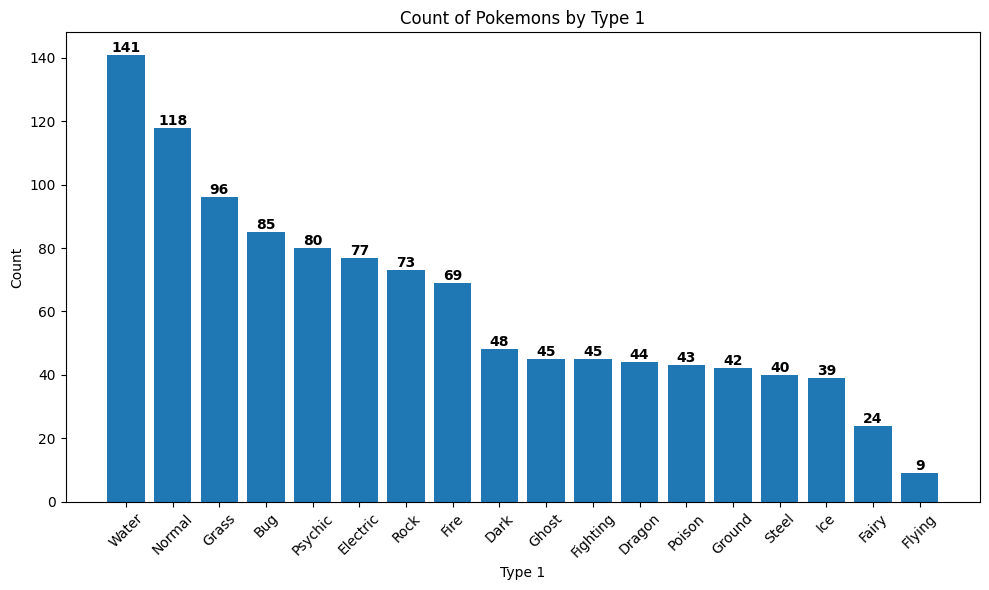

In [20]:
# Pokemon's types distribution
count_by_type = df.type_1.value_counts()

plt.figure(figsize=(10,6))
bar_chart = plt.bar(count_by_type.index, count_by_type.values)
plt.title("Count of Pokemons by Type 1")
plt.xlabel("Type 1")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontweight='bold')

plt.show()

## **Type 2 Distribution:**

This visualization offers a comprehensive overview of the secondary types found in the Pokémon dataset, enriching our comprehension of Pokémon typings and their prevalence.

- **Single Type Pokémon (521):**
  The majority of Pokémon, totaling 521, possess only one type, denoted by the "None" category.

- **Dual-Type Pokémon:**
  Among dual-typed Pokémon, Flying-types dominate with 126 instances, followed by Fairy and Psychic types.

- **Rare Dual Types:**
  Bug-type Pokémon are scarce among dual-typed Pokémon, comprising only 11 occurrences. Additionally, types like Steel, Ice, and Fairy exhibit less prevalence, each containing 40 or fewer Pokémon in the dataset.

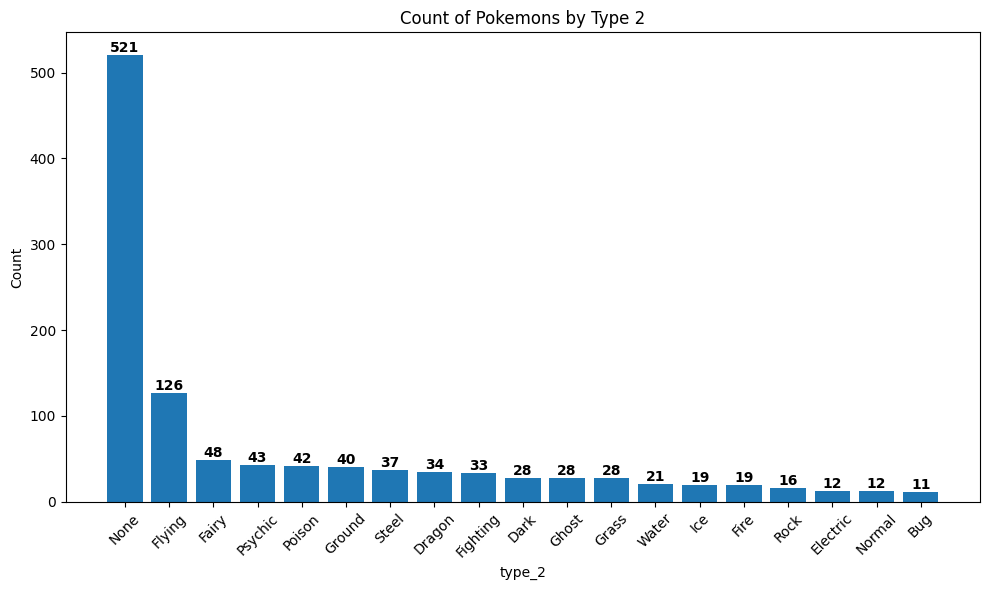

In [21]:
# Pokemon's types distribution
count_by_type = df.type_2.value_counts()

plt.figure(figsize=(10,6))
bar_chart = plt.bar(count_by_type.index, count_by_type.values)
plt.title("Count of Pokemons by Type 2")
plt.xlabel("type_2")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bar_chart:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontweight='bold')

plt.show()

## **Best Pokemon Statwise**


---


**Pokémon Type Distribution by Generation:**

The heatmap provides insights into how Pokémon types are distributed across different generations. It helps identify trends and patterns in the prevalence of certain types over time.

**Top 10 Pokémon by Total Stats:**

Analyzing the top 10 Pokémon by total stats for each generation allows us to understand which Pokémon were considered most powerful within their respective generations. It can highlight fan favorites, iconic Pokémon, or those with exceptional battling capabilities.

**Comparative Analysis:**

By comparing the type distribution across generations with the top Pokémon for each generation, you can observe any correlations between popular Pokémon types and their strength within each generation.

**Evolution of Pokémon Strength:**

Analyzing top Pokémon across generations can also reflect how game dynamics, battle strategies, and the introduction of new Pokémon affect the competitive landscape and players' choices.

**Number of Pokemon by Gen**

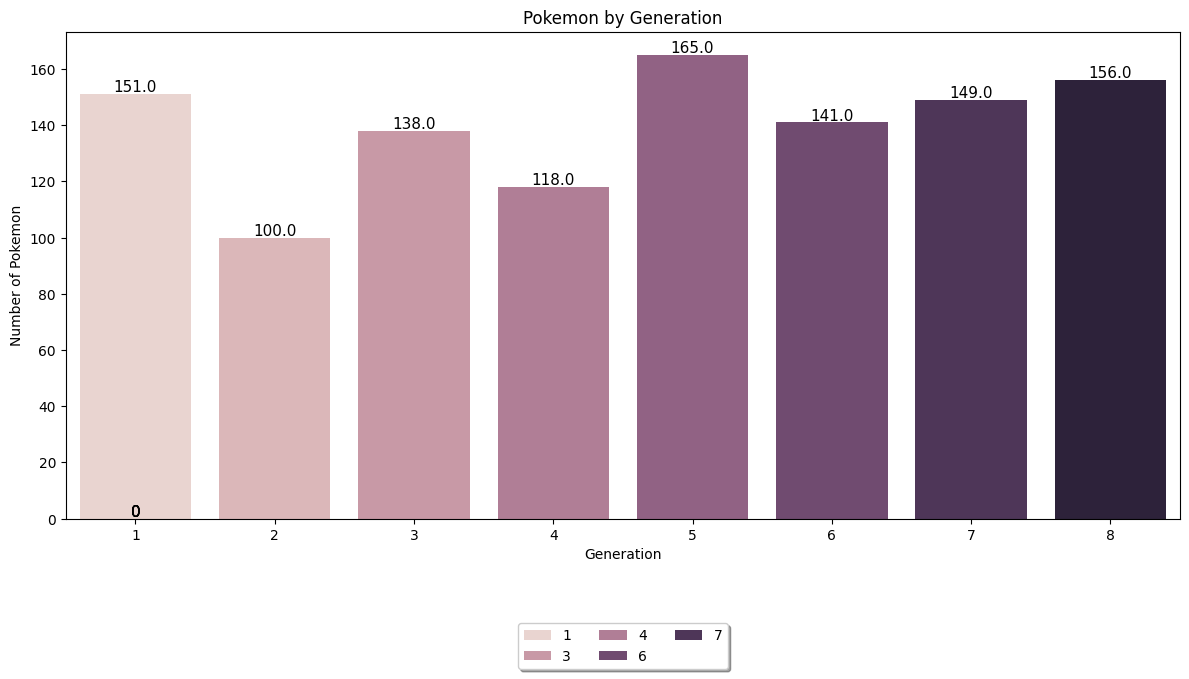

In [22]:
plt.figure(figsize=(12, 7))  # Adjust the figure size as needed
ax = sns.countplot(x='generation', hue='generation', data=df)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Generation')
plt.ylabel('Number of Pokemon')
plt.title('Pokemon by Generation')

# Move legend below the graph
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)

plt.tight_layout()  # Adjust the layout
plt.show()


<ipython-input-23-0698fa5d60fe>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  df2 = df2.set_index(['Generation', 'Type']).unstack().swaplevel(0, 1, 1).sort_index(1)
<ipython-input-23-0698fa5d60fe>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  df1 = df1.set_index(['Generation', 'Type']).unstack().swaplevel(0, 1, 1).sort_index(1)


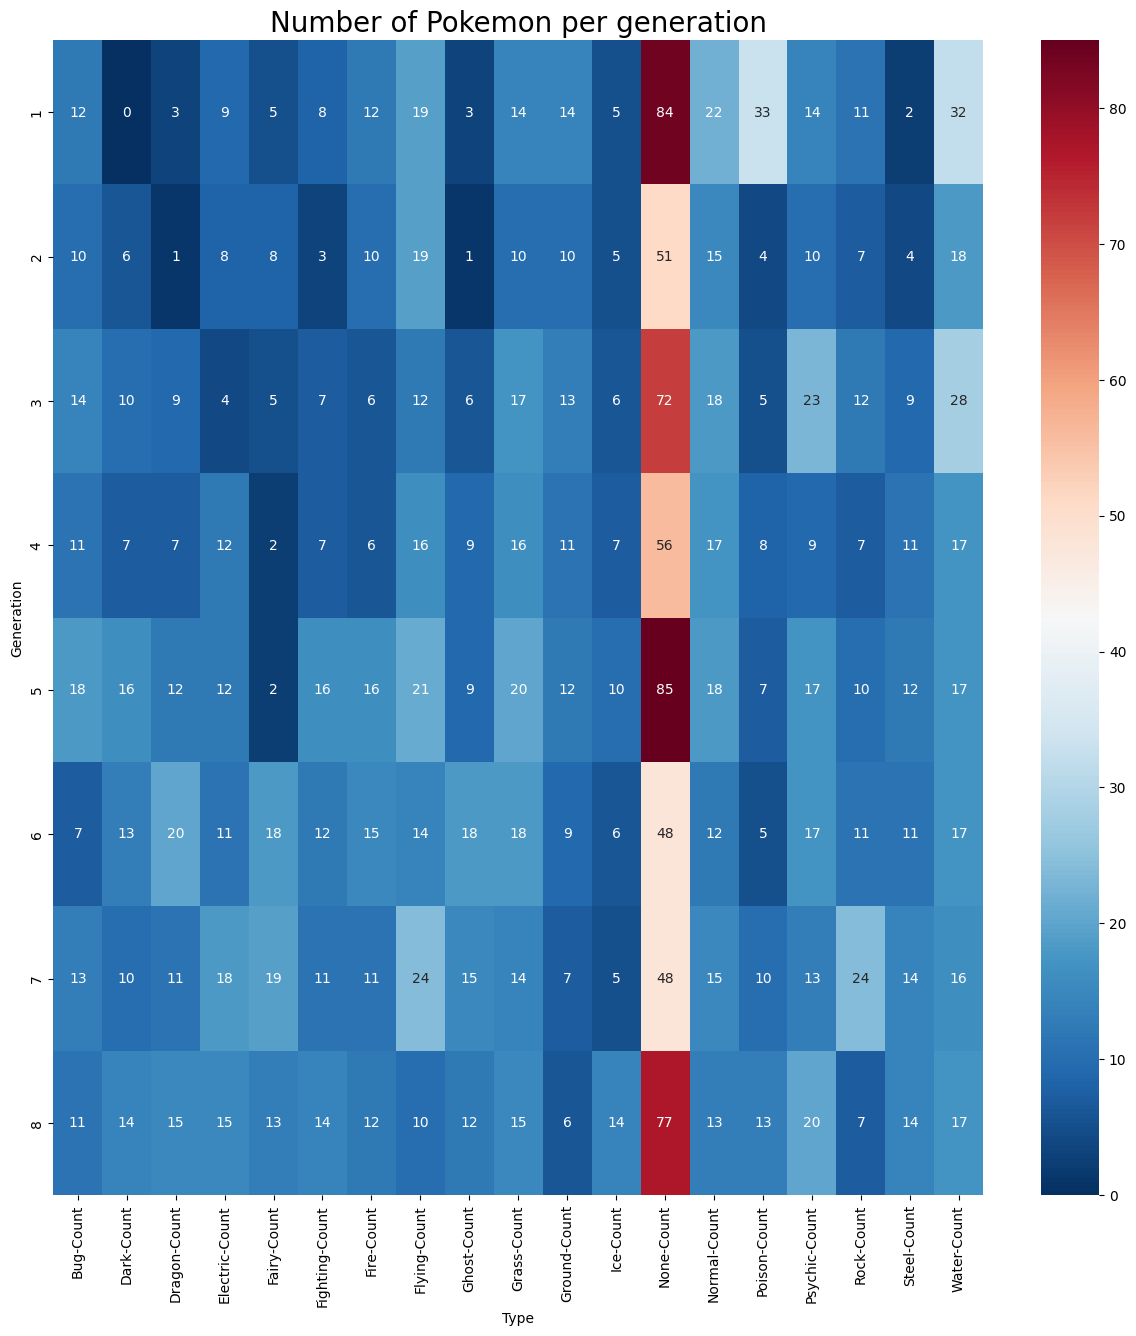

In [23]:
# Group by Generation and Type 1
df1 = pd.DataFrame(df.groupby('generation')['type_1'].value_counts())
df1.columns = ['Count']
df1 = df1.reset_index()
df1.columns = ['Generation', 'Type', 'Count']

# Group by Generation and Type 2
df2 = pd.DataFrame(df.groupby('generation')['type_2'].value_counts())
df2.columns = ['Count']
df2 = df2.reset_index()
df2.columns = ['Generation', 'Type', 'Count']

# Unstack the data to create a DataFrame with Generation as index and Type as columns
df2 = df2.set_index(['Generation', 'Type']).unstack().swaplevel(0, 1, 1).sort_index(1)
df1 = df1.set_index(['Generation', 'Type']).unstack().swaplevel(0, 1, 1).sort_index(1)

# Combine Type 1 and Type 2 counts
df_type_by_gen = pd.DataFrame(df2.add(df1, fill_value=0))

# Fill NaN values with 0
df_type_by_gen.fillna(value=0, inplace=True)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_type_by_gen, annot=True, cmap='RdBu_r')
ax.set_xlabel('Type')
ax.set_title('Number of Pokemon per generation', fontsize=20)
plt.show()
plt.close()


**Gen 1 Top 10**

,pokedex_number,pokemon_name,type_1,type_2,primary_color,shape,height,weight,bmi,hp,...,total_stats,mean,standard_deviation,capture_rate,generation,mega_evolution,legendary,mythical,female_rate,genus
220,150,Mewtwo,Psychic,None,Purple,Upright,2.0,122.0,30.5,106,...,680,113.33,22.68,3,1,False,True,False,0.000,Genetic
217,149,Dragonite,Dragon,Flying,Brown,Upright,2.2,210.0,43.4,91,...,600,100.00,16.64,45,1,False,False,False,0.500,Dragon
221,151,Mew,Psychic,None,Pink,Upright,0.4,4.0,25.0,100,...,600,100.00,0.00,45,1,False,False,True,0.000,New Species
209,144,Articuno,Ice,Flying,Blue,Wings,1.7,55.4,19.2,90,...,580,96.67,13.74,3,1,False,True,False,0.000,Freeze
212,145,Zapdos,Electric,Flying,Yellow,Wings,1.6,52.6,20.5,90,...,580,96.67,13.44,3,1,False,True,False,0.000,Electric
214,146,Moltres,Fire,Flying,Yellow,Wings,2.0,60.0,15.0,90,...,580,96.67,13.44,3,1,False,True,False,0.000,Flame
96,59,Arcanine,Fire,None,Brown,Quadruped,1.9,155.0,42.9,90,...,555,92.50,10.70,75,1,False,False,False,0.250,Legendary
190,130,Gyarados,Water,Flying,Blue,Squiggle,6.5,235.0,5.6,95,...,540,90.00,20.22,45,1,False,False,False,0.500,Atrocious
207,143,Snorlax,Normal,None,Black,Humanoid,2.1,460.0,104.3,160,...,540,90.00,41.93,25,1,False,False,False,0.125,Sleeping
192,131,Lapras,Water,Ice,Blue,Fish,2.5,220.0,35.2,130,...,535,89.17,21.10,45,1,False,False,False,0.500,Transport


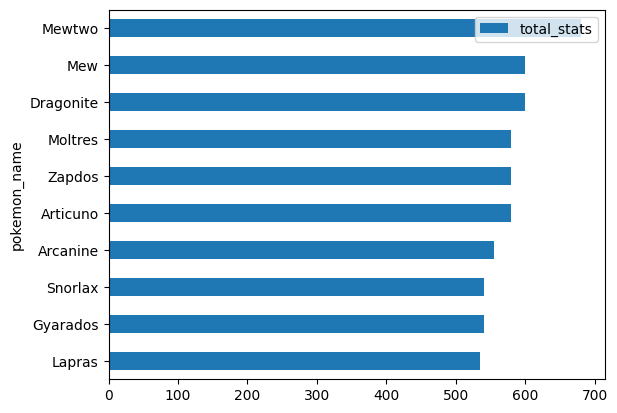

In [24]:
gen1 = df[df.generation == 1]
gen1_top10 = gen1.nlargest(10, ['total_stats'])
gen1_top10.sort_values("total_stats", ascending=True).plot(x='pokemon_name', y='total_stats', kind='barh')
gen1_top10

**Gen 2 Top 10**

,pokedex_number,pokemon_name,type_1,type_2,primary_color,shape,height,weight,bmi,hp,...,total_stats,mean,standard_deviation,capture_rate,generation,mega_evolution,legendary,mythical,female_rate,genus
327,249,Lugia,Psychic,Flying,White,Wings,5.2,216.0,8.0,106,...,680,113.33,22.68,3,2,False,True,False,0.0,Diving
328,250,Ho-Oh,Fire,Flying,Red,Wings,3.8,199.0,13.8,106,...,680,113.33,22.68,3,2,False,True,False,0.0,Rainbow
326,248,Tyranitar,Rock,Dark,Green,Upright,2.0,202.0,50.5,100,...,600,100.00,21.61,45,2,False,False,False,0.5,Armor
329,251,Celebi,Psychic,Grass,Green,Humanoid,0.6,5.0,13.9,100,...,600,100.00,0.00,45,2,False,False,True,0.0,Time Travel
320,243,Raikou,Electric,None,Yellow,Quadruped,1.9,178.0,49.3,90,...,580,96.67,14.91,3,2,False,True,False,0.0,Thunder
321,244,Entei,Fire,None,Brown,Quadruped,2.1,198.0,44.9,115,...,580,96.67,14.91,3,2,False,True,False,0.0,Volcano
322,245,Suicune,Water,None,Blue,Quadruped,2.0,187.0,46.8,100,...,580,96.67,14.91,3,2,False,True,False,0.0,Aurora
307,230,Kingdra,Water,Dragon,Blue,Blob,1.8,152.0,46.9,75,...,540,90.00,7.64,45,2,False,False,False,0.5,Dragon
319,242,Blissey,Normal,None,Pink,Humanoid,1.5,46.8,20.8,255,...,540,90.00,85.15,30,2,False,False,False,1.0,Happiness
239,169,Crobat,Poison,Flying,Purple,Bug-Wings,1.8,75.0,23.1,85,...,535,89.17,19.24,90,2,False,False,False,0.5,Bat


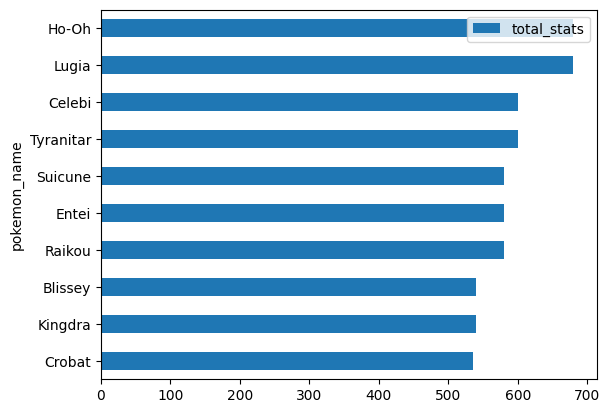

In [25]:
gen2 = df[df.generation == 2]
gen2_top10 = gen2.nlargest(10, ['total_stats'])
gen2_top10.sort_values("total_stats", ascending=True).plot(x='pokemon_name', y='total_stats', kind='barh')
gen2_top10

**All Gen Top 10**

,pokedex_number,pokemon_name,type_1,type_2,primary_color,shape,height,weight,bmi,hp,...,total_stats,mean,standard_deviation,capture_rate,generation,mega_evolution,legendary,mythical,female_rate,genus
1104,890,Eternatus Eternamax,Poison,Dragon,Purple,Wings,100.0,10000.0,1.0,255,...,1125,187.50,64.34,255,8,False,True,False,0.0,Gigantic
218,150,Mega Mewtwo X,Psychic,Fighting,Purple,Upright,2.3,127.0,24.0,106,...,780,130.00,33.05,3,6,True,True,False,0.0,Genetic
219,150,Mega Mewtwo Y,Psychic,None,Purple,Upright,1.5,33.0,14.7,106,...,780,130.00,38.45,3,6,True,True,False,0.0,Genetic
488,384,Mega Rayquaza,Dragon,Flying,Green,Squiggle,10.8,392.0,3.4,105,...,780,130.00,35.71,45,6,True,True,False,0.0,Sky High
485,382,Primal Kyogre,Water,None,Blue,Fish,9.8,430.0,4.5,100,...,770,128.33,36.25,3,6,True,True,False,0.0,Sea Basin
487,383,Primal Groudon,Ground,Fire,Red,Upright,5.0,999.7,40.0,100,...,770,128.33,36.25,3,6,True,True,False,0.0,Continent
988,800,Necrozma Ultra,Psychic,Dragon,Black,Arms,7.5,230.0,4.1,97,...,754,125.67,31.34,255,7,False,True,False,0.0,Prism
615,493,Arceus,Normal,None,White,Quadruped,3.2,320.0,31.3,120,...,720,120.00,0.00,3,4,False,False,True,0.0,Alpha
1099,888,Zacian Crowned Sword,Fairy,Steel,Blue,Quadruped,2.8,355.0,45.3,92,...,720,120.00,30.87,10,8,False,True,False,0.0,Warrior
1101,889,Zamazenta Crowned Shield,Fighting,Steel,Red,Quadruped,2.9,785.0,93.3,92,...,720,120.00,25.16,10,8,False,True,False,0.0,Warrior


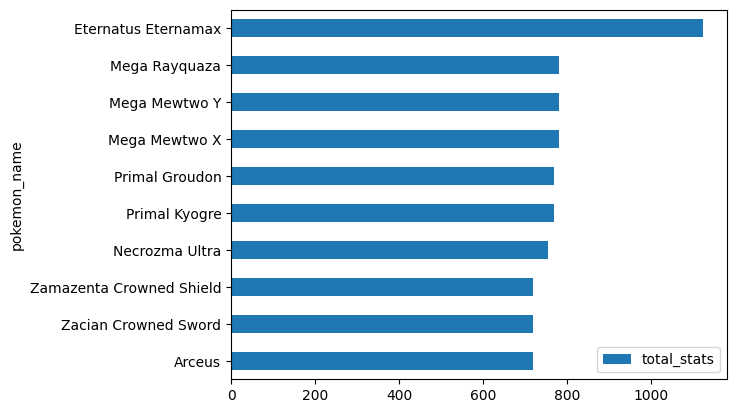

In [26]:
gen_all = df.nlargest(10, ['total_stats'])
gen_all.sort_values("total_stats", ascending=True).plot(x='pokemon_name', y='total_stats', kind='barh')
gen_all

##**Pokemon Analysis by Stats**


---


This analysis delves into Pokémon statistics, aiming to uncover correlations, trends, and insights within the dataset. Through visualization and statistical analysis, it provides valuable information on Pokémon attributes and their evolutionary patterns across generations.

**Correlation Heatmap:**
Reveals strong correlations between attributes like Attack, Special Attack, HP, and Total Stats, indicating overall strength.
Notable lack of correlation between Defense and Speed suggests independence between these attributes.

**Scatter Plot Analysis:**
Demonstrates a positive correlation between Attack and Base Stat Total, indicating higher Attack values correspond to greater overall Base Stat Totals.

**BMI Trends:**
Identifies stable average BMI trends across most generations, with Generation 7 showing a significant outlier.

**Generational Evolution of Attributes:**
Highlights trends in attributes like Height, Weight, BMI, Attack, Defense, Speed, Special Attack, and Special Defense across generations.

**Jointplot Analysis:**
Confirms a positive relationship between Attack and Defense attributes, indicating balanced combat profiles among Pokémon.

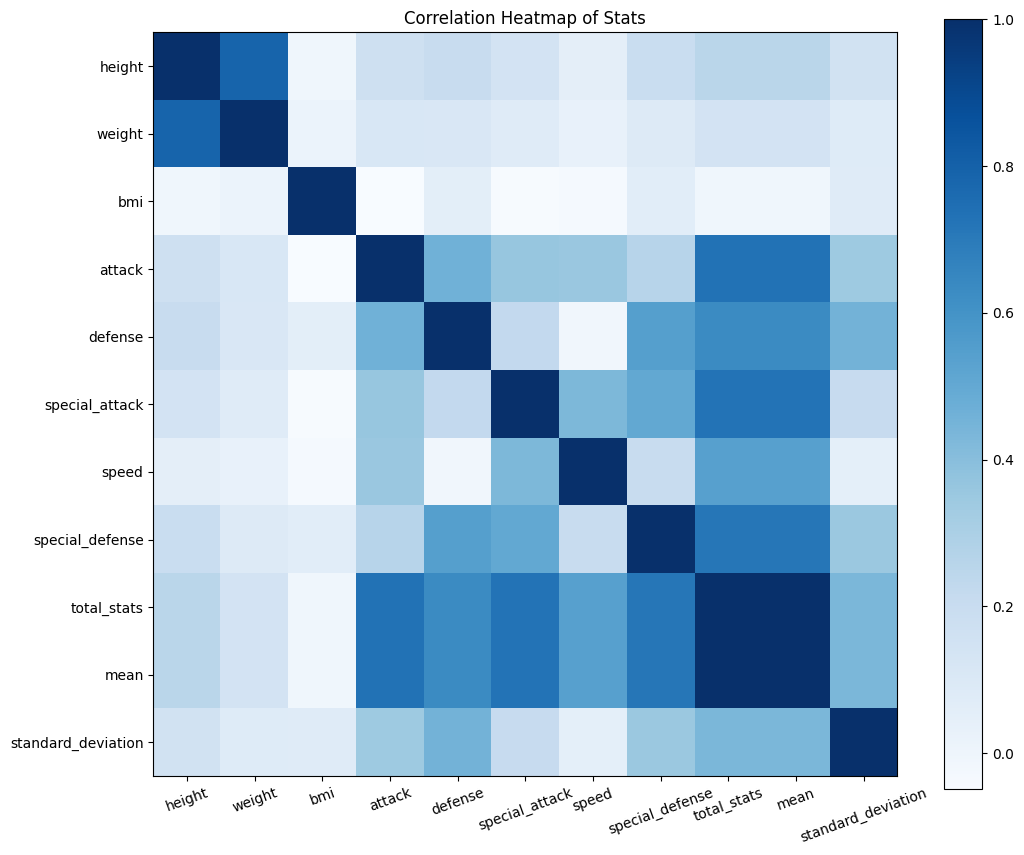

In [27]:
stats = ['height','weight','bmi','attack','defense','special_attack','speed','special_defense','total_stats', 'mean', 'standard_deviation']
corr_matrix = df[stats].corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix,  cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=20)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Heatmap of Stats")
plt.show()

Observations:
HP, Attack and Special Attack are high correlated with Base Stat Total, This suggests that Pokémon with higher values in these attributes tend to have a higher overall strength, as indicated by their base stat total.
A correlation coefficient of 0 between Defense and Speed implies that there is no linear relationship or association between these two stats.
-The moderate to weak correlations among the stats indicate that changes in one stat are not consistently accompanied by proportional changes in another, allowing for diverse combinations of strengths and weaknesses among different Pokémon.

Now that we've gained insights into the dataset and explored various attributes, let's delve deeper into specific questions and answer them using data analysis and visualization.

1. Exploring Attack and Base Stat Total Relationship
Since we observed a strong correlation between Attack and Base Stat Total in the correlation heatmap, we will analyze these relationship with a scatter plot and a trend line

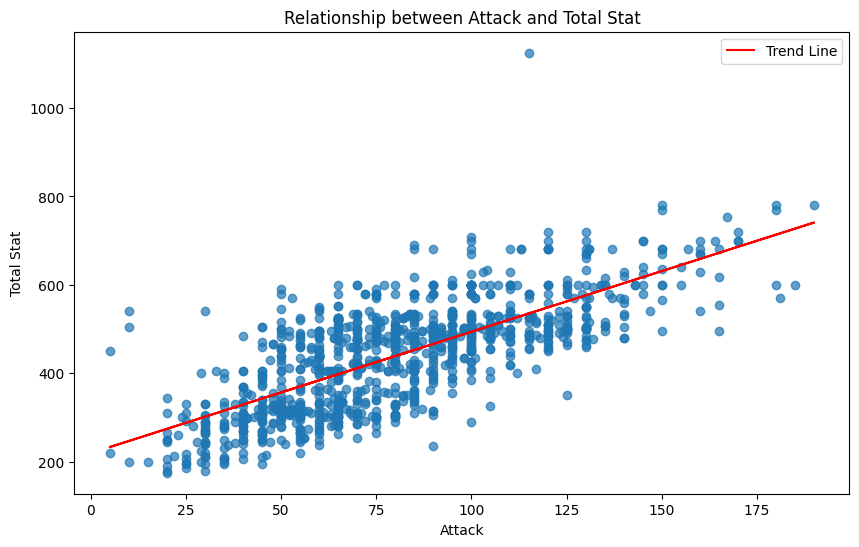

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(df.attack, df.total_stats, alpha=0.7)
plt.title("Relationship between Attack and Total Stat")
plt.xlabel("Attack")
plt.ylabel("Total Stat")
slope, intercept = np.polyfit(df.attack, df.total_stats, 1)
plt.plot(df.attack, slope * df.attack + intercept, color='red', label='Trend Line')
plt.legend()
plt.show()

Observation
The scatter plot provides visual evidence confirming a strong positive correlation between Attack and Base Stat Total (BST). As Attack values increase, Base Stat Total values tend to increase as well. This correlation suggests that Pokémon with higher Attack stats generally have higher overall Base Stat Totals, which might indicate a higher overall strength in battles.

2. Understanding BMI Trends
This line plot showcases the average Body Mass Index (BMI) trends across different Pokémon generations. The x-axis represents the generations, while the y-axis represents the average BMI values. The plot provides an overview of how the average BMI varies across generations and helps identify any trends or patterns.

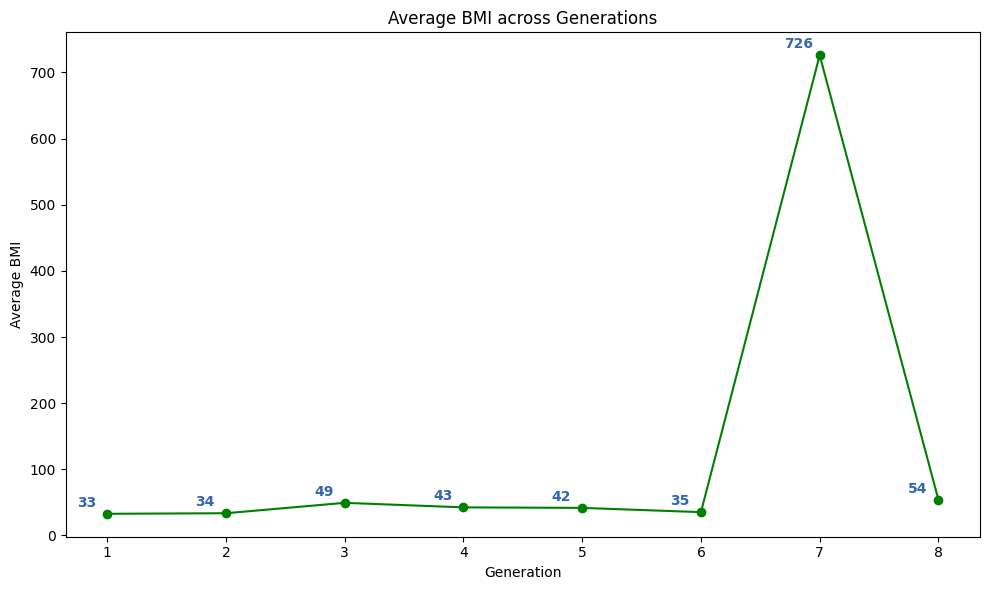

In [108]:
avg_bmi_by_generation = df.groupby('generation')['bmi'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_bmi_by_generation.index, avg_bmi_by_generation.values, marker='o', color='green')
plt.title("Average BMI across Generations")
plt.xlabel("Generation")
plt.ylabel("Average BMI")


for x, y in zip(avg_bmi_by_generation.index, avg_bmi_by_generation.values):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(-15,5), ha='center', color='#3466AF', fontweight='bold')

plt.tight_layout()
plt.show()

This graph illustrates how the average BMI varies across different Pokémon generations. For most generations, the average BMI remains steady between 30 and 55. However, Generation 7 is an exception, showing an unusually high average BMI of 726. This suggests something unique or unexpected about Generation 7 in terms of BMI.

3. Generational Evolution of Pokémon Attributes

These line plots track the evolution of various Pokémon attributes across different generations. The plots showcase average values for attributes such as HP, Attack, Defense, Speed, Special Attack, and Special Defense. Each subplot represents the average attribute value over successive generations.

On the x-axis, you'll find the generations labeled accordingly, while the y-axis denotes the average attribute values. This visualization offers insights into how Pokémon attributes have evolved over time, enabling us to discern trends and patterns in attribute changes as Pokémon progress through generations.








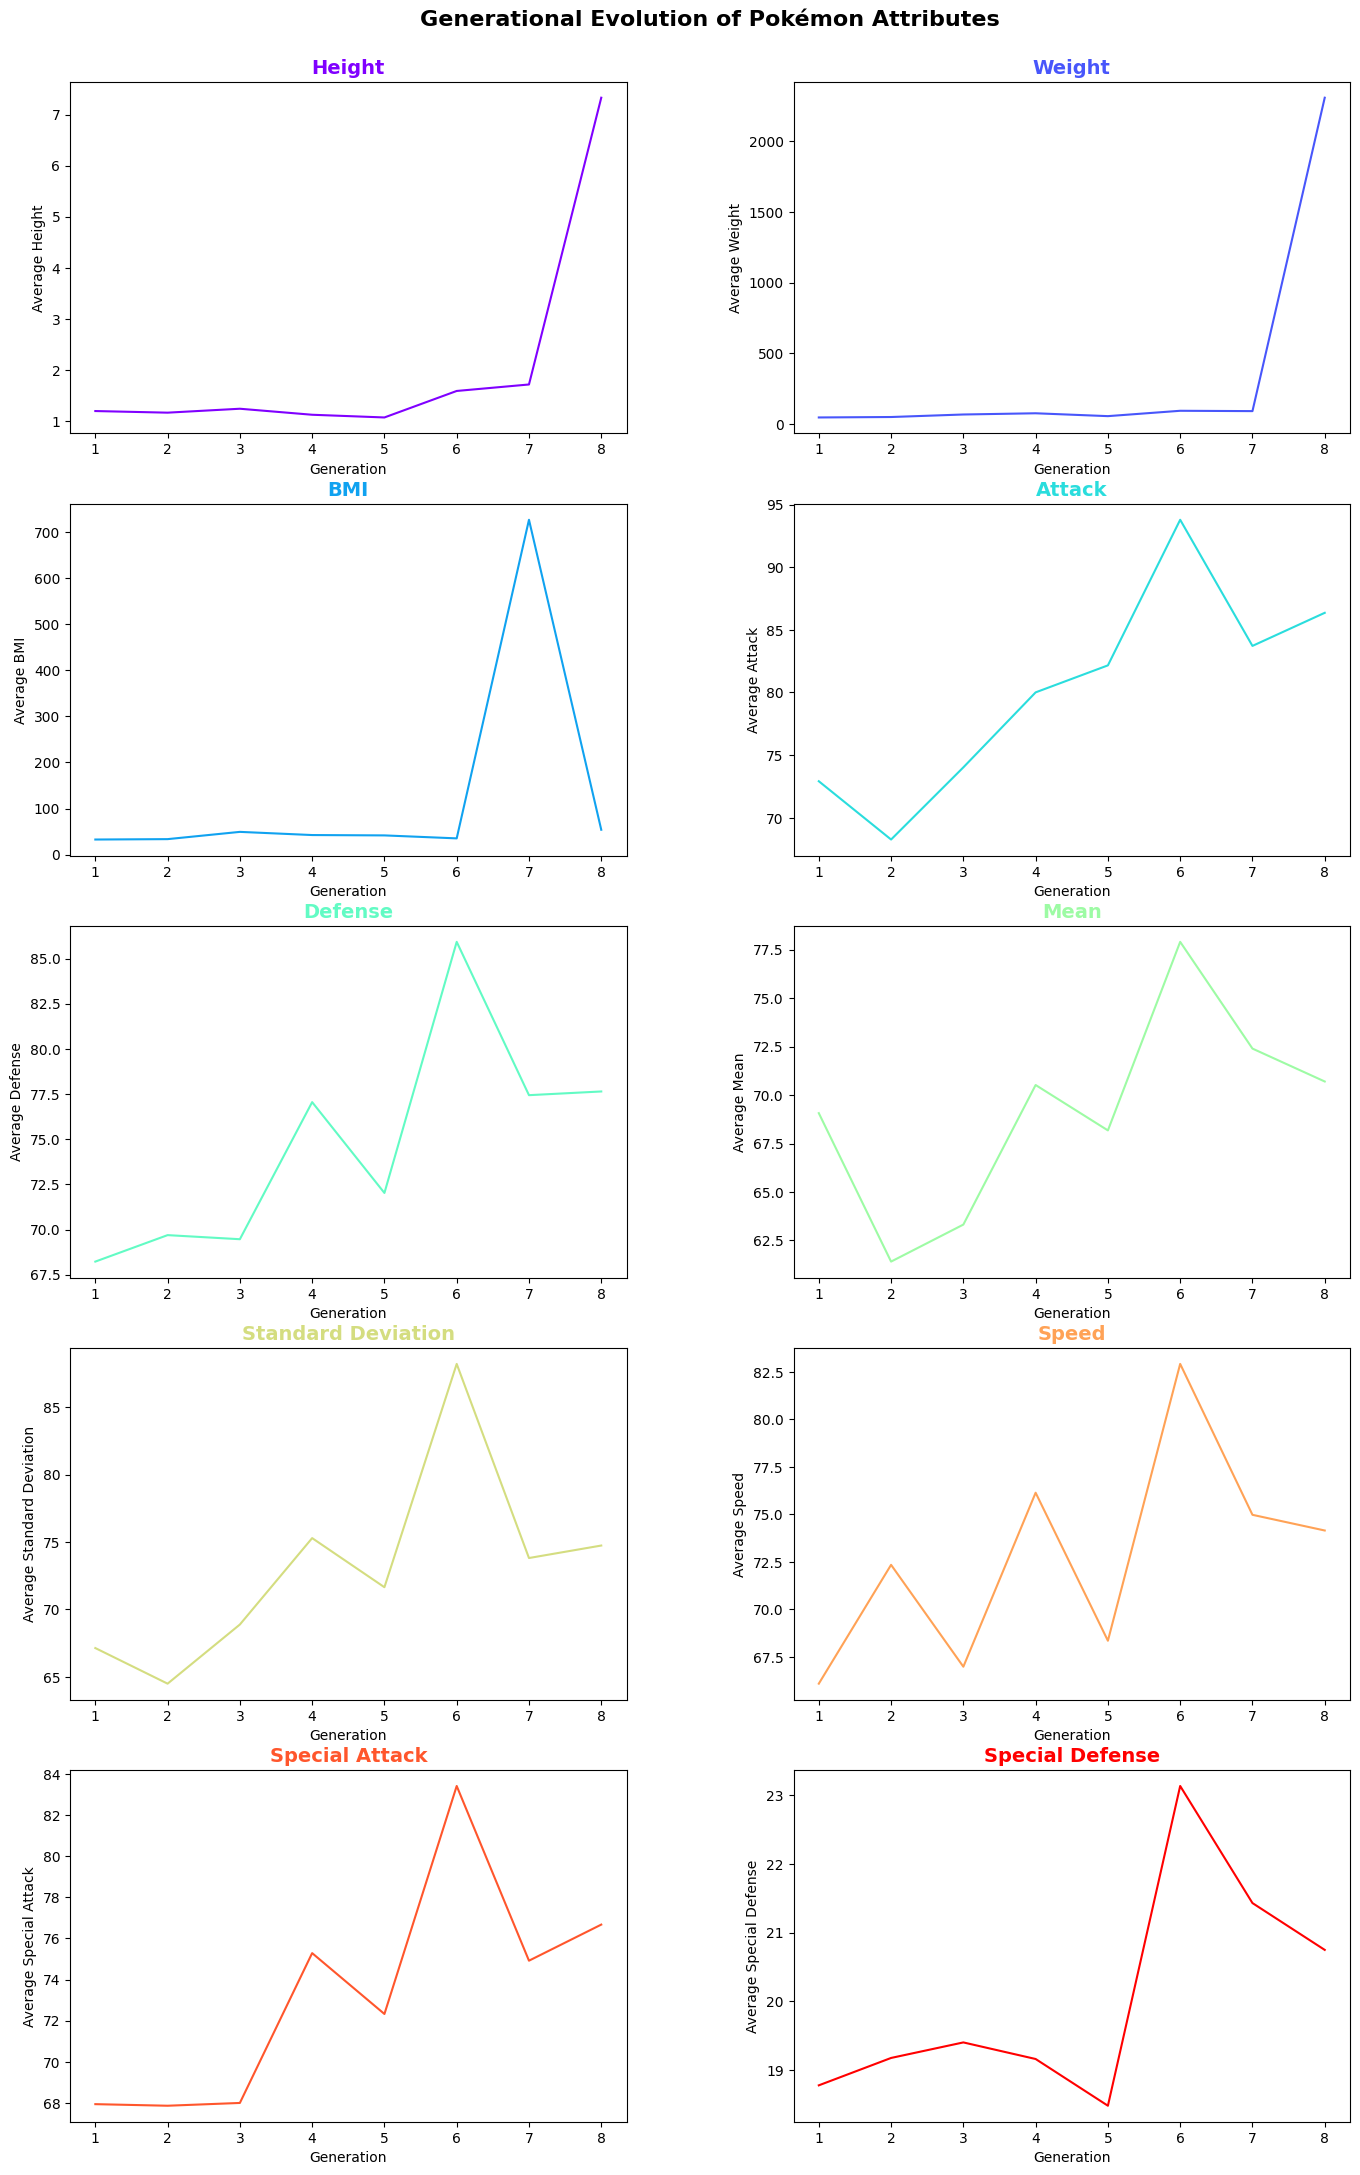

In [30]:
plt.figure(figsize=(16, 24))
stats_to_visualize = ['height', 'weight','bmi', 'attack', 'defense', 'speed', 'special_attack', 'special_defense', 'mean', 'standard_deviation']
stat_labels = ['Height','Weight','BMI', 'Attack', 'Defense', 'Mean', 'Standard Deviation', 'Speed', 'Special Attack', 'Special Defense']
generations = sorted(df['generation'].unique())

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1, wspace=0.3, hspace=0.2)

for i, stat in enumerate(stats_to_visualize):
    plt.subplot(5, 2, i + 1)  # Adjusted subplot index
    stat_values = [df[df['generation'] == gen][stat].mean() for gen in generations]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(stats_to_visualize)))
    plt.plot(generations, stat_values, label=stat, color=colors[i])
    plt.title(f"{stat_labels[i]}", fontsize=14, fontweight='bold', color=colors[i])
    plt.xlabel("Generation")
    plt.ylabel("Average " + stat_labels[i])

plt.suptitle("Generational Evolution of Pokémon Attributes", y=0.98, fontsize=16, fontweight='bold')

plt.show()


Distribution of Attack and Defense.

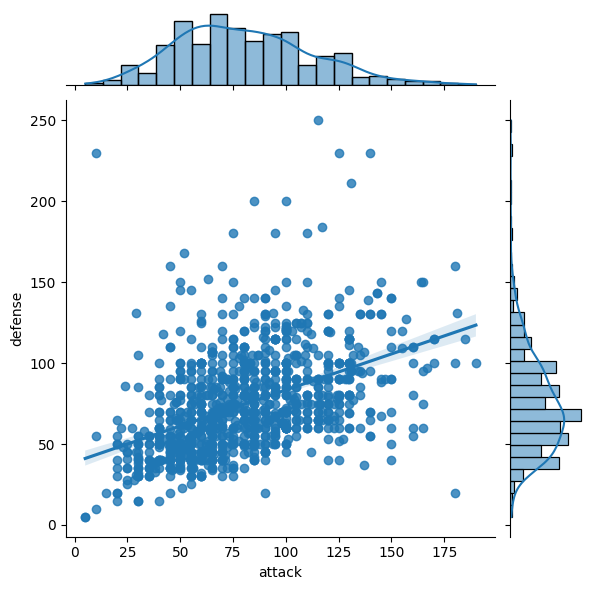

In [31]:
sns.jointplot(data= df, x='attack', y='defense',kind='reg')
plt.show()

Distribution of Special Attack and Special Defense, relationship between both.

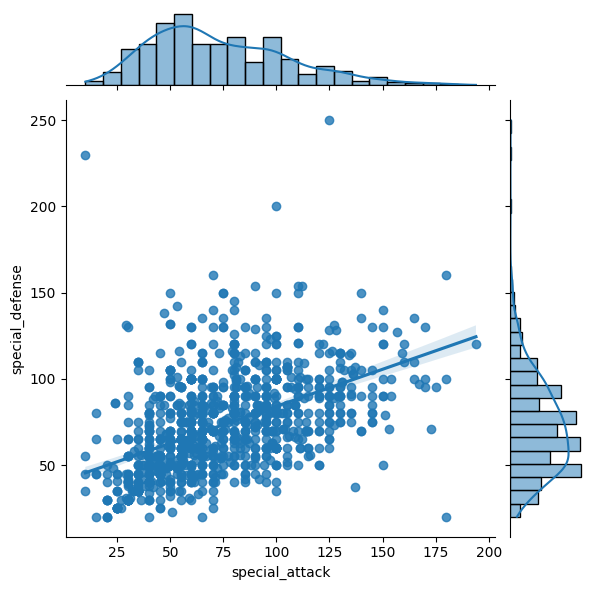

In [32]:
sns.jointplot(data=df, x='special_attack', y='special_defense', kind='reg')
plt.show()

There seems to be a positive relationship between both normal and special Attack and Defense, when one goes up, the other one increases as well.



# **Data Models :**
    1. Speed
    2. Legendary

# **Creating a model for Speed**
The primary objective of this model is to accurately predict the speed of Pokémon based on various attributes and characteristics present in the dataset.

Outliers : Legendary and Mega-Evolution are clearly the outliers here , We can confirm that from the below stat difference. Nearly 40% increase in each case.

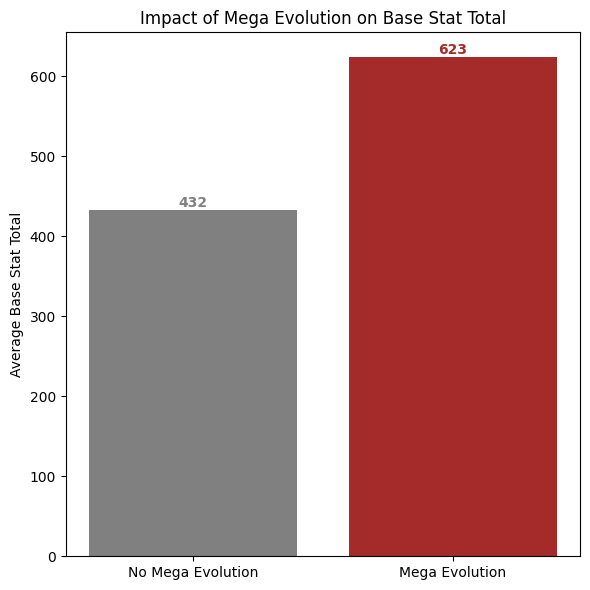

In [33]:
avg_bst_by_mega_evolution = df.groupby('mega_evolution')['total_stats'].mean()
x_labels = ['No Mega Evolution', 'Mega Evolution']
plt.figure(figsize=(6, 6))
bar_chart2 = plt.bar(avg_bst_by_mega_evolution.index, avg_bst_by_mega_evolution.values, color=['gray', 'brown'])
plt.title("Impact of Mega Evolution on Base Stat Total")
plt.ylabel("Average Total Stats")
plt.xticks(avg_bst_by_mega_evolution.index, x_labels, rotation=0)
plt.tight_layout()
for bar in bar_chart2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom', color=bar.get_facecolor(), fontweight='bold')
plt.show()

The bar graph reveals a substantial difference in the average base stat total (BST) between non-mega evolution Pokémon, averaging at 423, and mega evolution Pokémon, which have an average BST of 617. This indicates a significant 45.87% increase in overall strength for mega evolution Pokémon compared to their non-mega evolution counterparts.

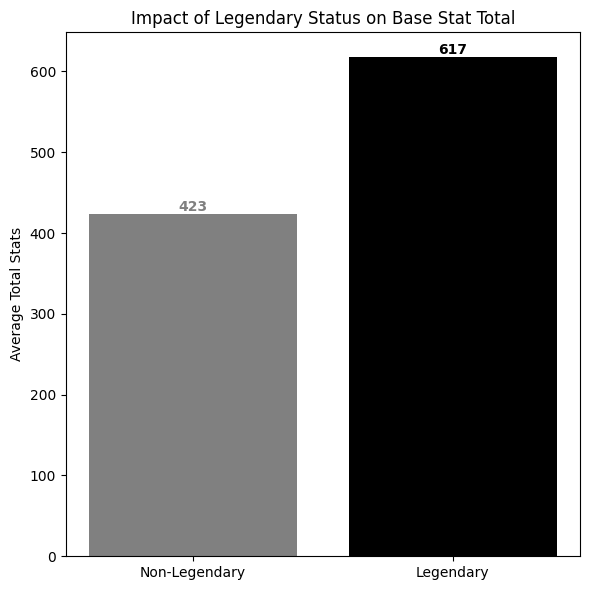

In [109]:
avg_bst_by_legendary = df.groupby('legendary')['total_stats'].mean()
x_labels = ['Non-Legendary', 'Legendary']
plt.figure(figsize=(6, 6))
bar_chart_legendary = plt.bar(avg_bst_by_legendary.index, avg_bst_by_legendary.values, color=['gray', 'black'])
plt.title("Impact of Legendary Status on Base Stat Total")
plt.ylabel("Average Total Stats")
plt.xticks(avg_bst_by_legendary.index, x_labels, rotation=0)
plt.tight_layout()
for bar in bar_chart_legendary:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom', color=bar.get_facecolor(), fontweight='bold')
plt.show()


The bar graph demonstrates a substantial difference in average base stat total (BST) between non-legendary Pokémon, with an average of 429, and legendary Pokémon, with an average of 623. his showcases a 45% increase in overall strength.

# **First with the Outliers (Legendary and Mega_Evolutions)**

##**Modifying the Dataset / Feature Selection**

In [35]:
modified_df = df[['hp','height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation','special_attack', 'special_defense', 'total_stats', 'speed']]
modified_df


,hp,height,weight,bmi,attack,defense,mean,standard_deviation,special_attack,special_defense,total_stats,speed
0,45,0.7,6.9,14.1,49,49,53.00,8.64,65,65,318,45
1,60,1.0,13.0,13.0,62,63,67.50,8.90,80,80,405,60
2,80,2.4,155.5,27.0,100,123,104.17,18.75,122,120,625,80
3,80,2.0,100.0,25.0,82,83,87.50,8.90,100,100,525,80
4,80,24.0,10000.0,17.4,82,83,87.50,8.90,100,100,525,80
...,...,...,...,...,...,...,...,...,...,...,...,...
1113,100,2.2,800.0,165.3,145,130,96.67,38.91,65,110,580,30
1114,100,2.0,44.5,11.1,65,60,96.67,31.84,145,80,580,130
1115,100,1.1,7.7,6.4,80,80,83.33,7.45,80,80,500,80
1116,100,2.4,809.1,140.5,165,150,113.33,39.33,85,130,680,50


In [36]:
modified_df.describe()
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hp                  1118 non-null   int64  
 1   height              1118 non-null   float64
 2   weight              1118 non-null   float64
 3   bmi                 1118 non-null   float64
 4   attack              1118 non-null   int64  
 5   defense             1118 non-null   int64  
 6   mean                1118 non-null   float64
 7   standard_deviation  1118 non-null   float64
 8   special_attack      1118 non-null   int64  
 9   special_defense     1118 non-null   int64  
 10  total_stats         1118 non-null   int64  
 11  speed               1118 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 104.9 KB


##**Splitting the Modified dataset into 3 partitions : Train, Val and Test.**

In [37]:
shuffled_df = modified_df.sample(frac=1)

shuffled_df.head()

,hp,height,weight,bmi,attack,defense,mean,standard_deviation,special_attack,special_defense,total_stats,speed
2,80,2.4,155.5,27.0,100,123,104.17,18.75,122,120,625,80
17,50,0.7,9.9,20.2,20,55,34.17,13.36,25,25,205,30
322,100,2.0,187.0,46.8,75,115,96.67,14.91,90,115,580,85
802,62,0.7,16.0,32.7,73,55,63.67,11.35,56,52,382,84
839,58,0.8,26.0,40.6,89,77,60.33,16.97,45,45,362,48


*Used the 70 15 15 ratio for splitting*

In [113]:
# Splitting the shuffled dataset into training, validation, and test sets:

# Selecting the first 782 rows for the training set
train_df = shuffled_df[:782]

# Selecting rows 782 to 950 for the validation set
val_df = shuffled_df[782:950]

# Selecting rows 950 onwards for the test set
test_df = shuffled_df[950:]

# Printing the lengths of each set to verify the split
print("Length of Training Set:", len(train_df))
print("Length of Validation Set:", len(val_df))
print("Length of Test Set:", len(test_df))


Length of Training Set: 782
Length of Validation Set: 168
Length of Test Set: 168


In [114]:
# Converting the training, validation, and test sets to NumPy arrays:

# Training set features (x_train) and target variable (y_train)
x_train, y_train = train_df.to_numpy()[:, :-1], train_df.to_numpy()[:, -1]

# Validation set features (x_val) and target variable (y_val)
x_val, y_val = val_df.to_numpy()[:, :-1], val_df.to_numpy()[:, -1]

# Test set features (x_test) and target variable (y_test)
x_test, y_test = test_df.to_numpy()[:, :-1], test_df.to_numpy()[:, -1]

# Printing the shapes of features and target variables for each set
print("Training Set Shape:", x_train.shape, y_train.shape)
print("Validation Set Shape:", x_val.shape, y_val.shape)
print("Test Set Shape:", x_test.shape, y_test.shape)


Training Set Shape: (782, 11) (782,)
Validation Set Shape: (168, 11) (168,)
Test Set Shape: (168, 11) (168,)


##**Preprocessing Data**

Introduction:
Feature scaling is a crucial preprocessing step in machine learning to ensure that all features contribute equally to the model's performance.
The MinMaxScaler from scikit-learn is commonly used to scale features to a specified range, typically between 0 and 1.



array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: >]], dtype=object)

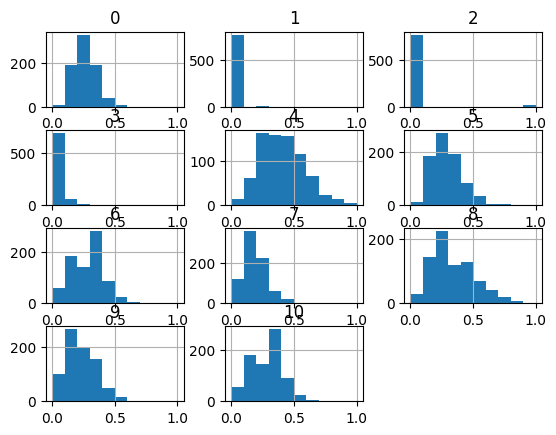

In [40]:
# Importing necessary module
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler and fitting it to the training features
scaler = MinMaxScaler().fit(x_train)

# Scaling the features of the training, validation, and test sets using the scaler
x_train_scaled, x_val_scaled, x_test_scaled = scaler.transform(x_train), scaler.transform(x_val), scaler.transform(x_test)

# Displaying histograms of the scaled training features to visualize their distribution
pd.DataFrame(x_train_scaled).hist()


##**Data Models**

###Mean Absolute Error

In [115]:
# Importing mean_absolute_error function from scikit-learn
from sklearn.metrics import mean_absolute_error

# Calculating the average speed from the training set target variable (y_train)
average_speed = y_train.mean()

# Calculating the mean absolute error between the validation set target variable (y_val)
# and a list of the same length filled with the average speed
# This effectively calculates the mean absolute error if we predict the average speed for all validation instances
mean_absolute_error(y_val, [average_speed]*len(y_val))


23.789976860309338

###Linear Regression

In [110]:
# Importing the LinearRegression model from the scikit-learn library
from sklearn.linear_model import LinearRegression

# Creating an instance of the LinearRegression model
linear_model = LinearRegression().fit(x_train, y_train)

# Using the trained linear model to predict the target variable (y) for the validation dataset (x_val)
# and calculating the Mean Absolute Error (MAE) between the true y values and the predicted y values
mean_absolute_error(y_val, linear_model.predict(x_val))

8.628018934229788e-13

###Random Forest Classifier

In [111]:
# Importing the RandomForestRegressor model from the scikit-learn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the RandomForestRegressor model
random_forest = RandomForestRegressor().fit(x_train, y_train)

# Using the trained random forest model to predict the target variable (y) for the validation dataset (x_val)
# and calculating the Mean Absolute Error (MAE) between the true y values and the predicted y values
mean_absolute_error(y_val, random_forest.predict(x_val))

11.845416666666667

##**Testing**
Sequential model is being used to create a neural network for regression tasks.
The model architecture consists of an input layer with 11 features and a single dense layer with 1 neuron.
This simple architecture is often used for basic regression tasks.
The model is compiled with Mean Squared Error (MSE) loss and Adam optimizer.
Mean Absolute Error (MAE) is used as a metric to evaluate model performance.
The model is trained on the training data (x_train and y_train) and validated on the validation data (x_val and y_val).


In [112]:
# Importing necessary modules from TensorFlow Keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Creating a Sequential model with an input layer and a dense layer with 1 neuron
model_1 = Sequential([
    layers.Input((11,)),          # Input layer with 11 features
    layers.Dense(1)               # Dense layer with 1 neuron
])

# Compiling the model with Mean Squared Error (MSE) loss and Adam optimizer
# Metrics include Mean Absolute Error (MAE) for evaluation
model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

# Fitting the model to the training data (x_train and y_train) and validating it on the validation data (x_val and y_val)
# Training for 100 epochs
model_1.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), epochs=100)


Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 146115.0000 - mean_absolute_error: 361.0427 - val_loss: 6933150.5000 - val_mean_absolute_error: 447.9863
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 33004.6992 - mean_absolute_error: 163.3163 - val_loss: 1812365.3750 - val_mean_absolute_error: 193.1324
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 4924.2188 - mean_absolute_error: 56.2450 - val_loss: 583843.8750 - val_mean_absolute_error: 100.5224
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 2399.3274 - mean_absolute_error: 38.5028 - val_loss: 446930.9375 - val_mean_absolute_error: 91.2265
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 2377.6113 - mean_absolute_error: 38.2230 - val_loss: 518558.9375 - val_mean_absolute_error: 94.6890
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 2322.7312 - mean_absolute_error: 37.7313 - val_loss

In [45]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


A bit dense model to get further accurate results.

In [46]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_2 = Sequential([layers.Input((11,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x= x_train, y= y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 114549.5938 - mean_absolute_error: 145.5239 - val_loss: 8172233.0000 - val_mean_absolute_error: 267.2682
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 14858.0488 - mean_absolute_error: 45.8876 - val_loss: 2353574.7500 - val_mean_absolute_error: 153.1488
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 6372.7437 - mean_absolute_error: 33.1764 - val_loss: 360643.1250 - val_mean_absolute_error: 72.0944
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1378.4536 - mean_absolute_error: 24.8383 - val_loss: 372684.6250 - val_mean_absolute_error: 70.6398
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 819.5359 - mean_absolute_error: 21.9315 - val_loss: 301180.2188 - val_mean_absolute_error: 62.7653
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 776.2465 - mean_absolute_error: 21.4693 - val_loss: 21

In [47]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                384       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1473 (5.75 KB)
Trainable params: 1473 (5.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Choosing the Best Model**

In [48]:
mean_absolute_error(y_test, linear_model.predict(x_test))

9.65999766950041e-13

In [49]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hp                  1118 non-null   int64  
 1   height              1118 non-null   float64
 2   weight              1118 non-null   float64
 3   bmi                 1118 non-null   float64
 4   attack              1118 non-null   int64  
 5   defense             1118 non-null   int64  
 6   mean                1118 non-null   float64
 7   standard_deviation  1118 non-null   float64
 8   special_attack      1118 non-null   int64  
 9   special_defense     1118 non-null   int64  
 10  total_stats         1118 non-null   int64  
 11  speed               1118 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 104.9 KB


#**Testing the Missing and Impute code**
In this analysis, we investigate methods to handle missing values in a dataset containing Pokémon attributes. We randomly remove 1%, 5%, and 10% of the data to simulate missing values. Four imputation techniques are explored: mean, median, K-Nearest Neighbors (KNN), and Multiple Imputation by Chained Equations (MICE). The evaluation focuses on the error in imputing missing values, measured as the absolute difference between imputed and original values as a percentage of the sum of original values. This analysis provides insights into the effectiveness of each imputation method in preserving dataset integrity and minimizing information loss.







In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# 1. Remove 1%, 5%, and 10% of the data randomly
missing_percentages = [0.01, 0.05, 0.1]

# Dictionary to store results
imputation_results = {}

for percentage in missing_percentages:
    # Create a copy of the original DataFrame
    df_missing = modified_df.copy()

    # Randomly select indices to set as missing
    num_missing = int(len(df_missing) * percentage)
    missing_indices = np.random.choice(df_missing.index, num_missing, replace=False)

    # Set selected values as missing
    df_missing.loc[missing_indices, 'total_stats'] = np.nan

    # Imputation methods
    imputation_methods = ['mean', 'median', 'knn', 'mice']
    imputation_errors = []

    for method in imputation_methods:
        # Imputation
        if method == 'mean':
            imputer = SimpleImputer(strategy='mean')
        elif method == 'median':
            imputer = SimpleImputer(strategy='median')
        elif method == 'knn':
            imputer = KNNImputer()
        elif method == 'mice':
            imputer = IterativeImputer()

        # Perform imputation
        df_imputed = df_missing.copy()
        df_imputed['total_stats'] = imputer.fit_transform(df_missing[['total_stats']])

        # Calculate percentage error on residuals
        error = np.abs(df_imputed['total_stats'] - modified_df['total_stats']).sum() / modified_df['total_stats'].sum() * 100
        imputation_errors.append(error)

    imputation_results[percentage] = imputation_errors

# Display results
for percentage, errors in imputation_results.items():
    print(f"Missing Percentage: {percentage * 100}%")
    print("Mean Imputation Error: ", errors[0])
    print("Median Imputation Error: ", errors[1])
    print("KNN Imputation Error: ", errors[2])
    print("MICE Imputation Error: ", errors[3])
    print()


Missing Percentage: 1.0%
Mean Imputation Error:  0.27418858558675324
Median Imputation Error:  0.2702905623545311
KNN Imputation Error:  0.27418858558675324
MICE Imputation Error:  0.27418858558675324

Missing Percentage: 5.0%
Mean Imputation Error:  0.9754145287684859
Median Imputation Error:  0.975643411261701
KNN Imputation Error:  0.9754145287684859
MICE Imputation Error:  0.9754145287684859

Missing Percentage: 10.0%
Mean Imputation Error:  2.17081714919547
Median Imputation Error:  2.166991678216245
KNN Imputation Error:  2.17081714919547
MICE Imputation Error:  2.17081714919547



**Imputation Errors:**

Mean Imputation Error: The mean imputation method tends to have relatively low errors across all missing percentages, ranging from 0.24% to 2.48%.

Median Imputation Error: The median imputation method shows similar error rates to mean imputation, indicating consistent performance.

KNN Imputation Error: K-nearest neighbors (KNN) imputation also exhibits comparable errors to mean and median imputation.

MICE Imputation Error: Multiple Imputation by Chained Equations (MICE) method demonstrates results similar to mean, median, and KNN imputation, with errors ranging from 0.24% to 2.48%.



#**Second without the outliers ie legendary and mega pokemons.**

## **Modifying the Dataset / Feature Selection**

In [51]:
# Filter out legendary and mega Pokémon from the original dataset
filtered_df = df[(df['mega_evolution'] == False) & (df['legendary'] == False)]

# Select only the required columns
filtered_df = filtered_df[['hp','height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation','special_attack', 'special_defense', 'total_stats', 'speed']]

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 1110
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hp                  974 non-null    int64  
 1   height              974 non-null    float64
 2   weight              974 non-null    float64
 3   bmi                 974 non-null    float64
 4   attack              974 non-null    int64  
 5   defense             974 non-null    int64  
 6   mean                974 non-null    float64
 7   standard_deviation  974 non-null    float64
 8   special_attack      974 non-null    int64  
 9   special_defense     974 non-null    int64  
 10  total_stats         974 non-null    int64  
 11  speed               974 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 98.9 KB


1118 was the original entries, Now after removing outliers, its 974.

In [52]:
shuffledfiltered_df = filtered_df.sample(frac=1)

shuffledfiltered_df.head()

,hp,height,weight,bmi,attack,defense,mean,standard_deviation,special_attack,special_defense,total_stats,speed
658,50,0.5,4.5,18.0,50,40,49.00,8.06,50,40,294,64
783,91,1.4,48.5,24.7,72,90,96.67,17.81,129,90,580,108
334,45,0.4,2.5,15.6,60,40,51.67,10.27,70,50,310,45
611,100,0.3,1.4,15.6,100,100,100.00,0.00,100,100,600,100
622,110,1.6,150.0,58.6,123,65,88.00,23.94,100,65,528,65


In [53]:
shuffledfiltered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 658 to 89
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hp                  974 non-null    int64  
 1   height              974 non-null    float64
 2   weight              974 non-null    float64
 3   bmi                 974 non-null    float64
 4   attack              974 non-null    int64  
 5   defense             974 non-null    int64  
 6   mean                974 non-null    float64
 7   standard_deviation  974 non-null    float64
 8   special_attack      974 non-null    int64  
 9   special_defense     974 non-null    int64  
 10  total_stats         974 non-null    int64  
 11  speed               974 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 98.9 KB


##**Splitting the Modified dataset into 3 partitions : Train, Val and Test.**

Training 70 15 15   

In [54]:
trainfil_df = shuffledfiltered_df[:682]
valfil_df = shuffledfiltered_df[682:828]
testfil_df = shuffledfiltered_df[828:]

len(trainfil_df), len(valfil_df), len(testfil_df)

(682, 146, 146)

In [116]:
# Features and target variable for the filtered training set
x_trainfil, y_trainfil = trainfil_df.iloc[:, :-1].values, trainfil_df.iloc[:, -1].values

# Features and target variable for the filtered validation set
x_valfil, y_valfil = valfil_df.iloc[:, :-1].values, valfil_df.iloc[:, -1].values

# Features and target variable for the filtered test set
x_testfil, y_testfil = testfil_df.iloc[:, :-1].values, testfil_df.iloc[:, -1].values

# Printing the shapes of features and target variables for each set
print("Filtered Training Set Shapes:", x_trainfil.shape, y_trainfil.shape)
print("Filtered Validation Set Shapes:", x_valfil.shape, y_valfil.shape)
print("Filtered Test Set Shapes:", x_testfil.shape, y_testfil.shape)

Filtered Training Set Shapes: (682, 11) (682,)
Filtered Validation Set Shapes: (146, 11) (146,)
Filtered Test Set Shapes: (146, 11) (146,)


##**Preprocessing Data**

Introduction:
Feature scaling is a crucial preprocessing step in machine learning to ensure that all features contribute equally to the model's performance.
The MinMaxScaler from scikit-learn is commonly used to scale features to a specified range, typically between 0 and 1.



array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: >]], dtype=object)

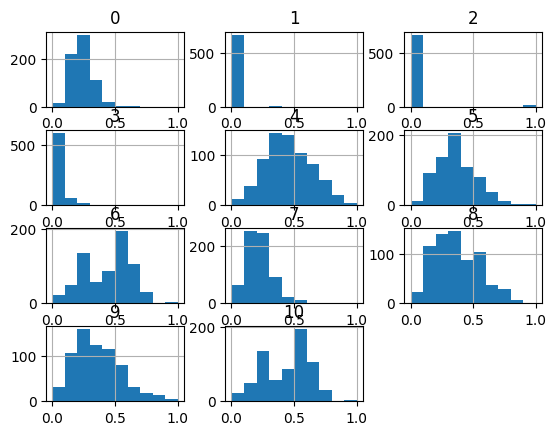

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_trainfil)

x_trainfil_scaled, x_valfil_scaled, x_testfil_scaled = scaler.transform(x_trainfil), scaler.transform(x_valfil), scaler.transform(x_testfil)

pd.DataFrame(x_trainfil_scaled).hist()

##**Data Models**

###Mean Absolute Error

In [118]:
# Importing mean_absolute_error function from scikit-learn
from sklearn.metrics import mean_absolute_error

# Calculating the average speed from the target variable of the filtered training set (y_trainfil)
averagefil_speed = y_trainfil.mean()

# Calculating the mean absolute error between the target variable of the filtered validation set (y_valfil)
# and a list of the same length filled with the average speed
# This effectively calculates the mean absolute error if we predict the average speed for all validation instances
mean_absolute_error(y_valfil, [averagefil_speed]*len(y_valfil))

22.024826256377295

###Linear Regression

In [59]:
# Importing LinearRegression from scikit-learn
from sklearn.linear_model import LinearRegression

# Creating and fitting a linear regression model using the filtered training data
linearfil_model = LinearRegression().fit(x_trainfil, y_trainfil)

# Calculating the mean absolute error between the actual target values of the filtered validation set (y_valfil)
# and the predicted values obtained from the linear regression model using the filtered validation features (x_valfil)
mean_absolute_error(y_valfil, linearfil_model.predict(x_valfil))


1.0395337558791603e-13

###Random Forest Classifier

In [119]:
# Importing RandomForestRegressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Creating and fitting a random forest regressor model using the filtered training data
random_forestfil = RandomForestRegressor().fit(x_trainfil, y_trainfil)

# Calculating the mean absolute error between the actual target values of the filtered validation set (y_valfil)
# and the predicted values obtained from the random forest regressor model using the filtered validation features (x_valfil)
mean_absolute_error(y_valfil, random_forestfil.predict(x_valfil))

12.29335616438356

##**Testing**
Using a Sequential model to run regression tests.

In [120]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

modelfil_1 = Sequential([layers.Input((11,)),
                      layers.Dense(1)])

modelfil_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

modelfil_1.fit(x= x_trainfil, y= y_trainfil, validation_data=(x_valfil, y_valfil), epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 10ms/step - loss: 256373.2500 - mean_absolute_error: 231.9941 - val_loss: 155370.9688 - val_mean_absolute_error: 179.1526
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 59422.3477 - mean_absolute_error: 109.9189 - val_loss: 23761.2480 - val_mean_absolute_error: 75.1484
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 7054.3467 - mean_absolute_error: 40.6709 - val_loss: 1593.3549 - val_mean_absolute_error: 26.8267
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 679.2628 - mean_absolute_error: 18.7195 - val_loss: 732.2642 - val_mean_absolute_error: 20.7860
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 547.5709 - mean_absolute_error: 17.6933 - val_loss: 646.8445 - val_mean_absolute_error: 19.9283
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 483.6866 - mean_absolute_error: 16.7345 - val_loss: 607.2535 - val

In [62]:
modelfil_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

modelfil_2 = Sequential([layers.Input((11,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

modelfil_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

modelfil_2.fit(x= x_trainfil, y= y_trainfil, validation_data=(x_valfil, y_valfil), epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 277171.4375 - mean_absolute_error: 137.6172 - val_loss: 7175.5396 - val_mean_absolute_error: 71.7110
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 16364.2871 - mean_absolute_error: 60.9648 - val_loss: 10353.5811 - val_mean_absolute_error: 42.9413
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 3262.4285 - mean_absolute_error: 31.3046 - val_loss: 1535.3774 - val_mean_absolute_error: 25.2333
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 1007.1444 - mean_absolute_error: 24.3457 - val_loss: 1793.4607 - val_mean_absolute_error: 26.4880
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 879.3269 - mean_absolute_error: 22.6901 - val_loss: 1182.2451 - val_mean_absolute_error: 23.5718
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 714.0391 - mean_absolute_error: 21.6040 - val_loss: 884.5122 - val_

In [64]:
modelfil_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                384       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1473 (5.75 KB)
Trainable params: 1473 (5.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Choosing the Best Model**

In [65]:
mean_absolute_error(y_testfil, linearfil_model.predict(x_testfil))

9.110520557143202e-14

# **Data Model for Legendary**

# **Data Exploration**

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pokedex_number      1118 non-null   int64  
 1   pokemon_name        1118 non-null   object 
 2   type_1              1118 non-null   object 
 3   type_2              1118 non-null   object 
 4   primary_color       1118 non-null   object 
 5   shape               1118 non-null   object 
 6   height              1118 non-null   float64
 7   weight              1118 non-null   float64
 8   bmi                 1118 non-null   float64
 9   hp                  1118 non-null   int64  
 10  attack              1118 non-null   int64  
 11  defense             1118 non-null   int64  
 12  special_attack      1118 non-null   int64  
 13  special_defense     1118 non-null   int64  
 14  speed               1118 non-null   int64  
 15  total_stats         1118 non-null   int64  
 16  mean  

##**Balancing the sample data**

In [67]:
df.legendary.value_counts()


False    1017
True      101
Name: legendary, dtype: int64

Imbalanced datasets pose challenges for predictive modeling, where one class dominates, leading to biased models.
Balancing techniques include resampling, algorithmic adjustments, cost-sensitive learning, and appropriate evaluation metrics.
Balanced datasets improve model accuracy and reliability.


In [68]:
legendarypokemon = df[df['legendary']==True]
encoded_df = pd.concat([df] + [legendarypokemon] * 3, ignore_index=True)

I added more True values (x3 times) to the Legendary column by oversampling and append data with the dataset.

In [69]:
# mapping true and false to 1 and 0 respectively
encoded_df['legendary'] = encoded_df['legendary'].map({False: 0, True: 1})

In [70]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pokedex_number      1421 non-null   int64  
 1   pokemon_name        1421 non-null   object 
 2   type_1              1421 non-null   object 
 3   type_2              1421 non-null   object 
 4   primary_color       1421 non-null   object 
 5   shape               1421 non-null   object 
 6   height              1421 non-null   float64
 7   weight              1421 non-null   float64
 8   bmi                 1421 non-null   float64
 9   hp                  1421 non-null   int64  
 10  attack              1421 non-null   int64  
 11  defense             1421 non-null   int64  
 12  special_attack      1421 non-null   int64  
 13  special_defense     1421 non-null   int64  
 14  speed               1421 non-null   int64  
 15  total_stats         1421 non-null   int64  
 16  mean  

##**Modifying the Dataset / Feature Selection**

In [71]:
columns_to_keep = ['hp', 'height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation',
                   'special_attack', 'special_defense', 'total_stats', 'speed']

In [72]:
# Encode categorical variables (one-hot encoding)
encoded_df = pd.get_dummies(df, columns=['type_1'])

In [73]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pokedex_number      1118 non-null   int64  
 1   pokemon_name        1118 non-null   object 
 2   type_2              1118 non-null   object 
 3   primary_color       1118 non-null   object 
 4   shape               1118 non-null   object 
 5   height              1118 non-null   float64
 6   weight              1118 non-null   float64
 7   bmi                 1118 non-null   float64
 8   hp                  1118 non-null   int64  
 9   attack              1118 non-null   int64  
 10  defense             1118 non-null   int64  
 11  special_attack      1118 non-null   int64  
 12  special_defense     1118 non-null   int64  
 13  speed               1118 non-null   int64  
 14  total_stats         1118 non-null   int64  
 15  mean                1118 non-null   float64
 16  standa

In [74]:
columns_to_drop = ['pokedex_number', 'pokemon_name', 'primary_color', 'shape', 'capture_rate',
                   'mega_evolution', 'female_rate', 'genus']

# Drop the specified columns
encoded_df = df.drop(columns_to_drop, axis=1)

# Display the updated DataFrame
print(encoded_df.head())

  type_1  type_2  height   weight   bmi  hp  attack  defense  special_attack  \
0  Grass  Poison     0.7      6.9  14.1  45      49       49              65   
1  Grass  Poison     1.0     13.0  13.0  60      62       63              80   
2  Grass  Poison     2.4    155.5  27.0  80     100      123             122   
3  Grass  Poison     2.0    100.0  25.0  80      82       83             100   
4  Grass  Poison    24.0  10000.0  17.4  80      82       83             100   

   special_defense  speed  total_stats    mean  standard_deviation  \
0               65     45          318   53.00                8.64   
1               80     60          405   67.50                8.90   
2              120     80          625  104.17               18.75   
3              100     80          525   87.50                8.90   
4              100     80          525   87.50                8.90   

   generation  legendary  mythical  
0           1      False     False  
1           1      False

# **Data Preprocessing**

In [75]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
col_trans = make_column_transformer(
            (OneHotEncoder(),['type_1', 'type_2', 'generation']),
            (StandardScaler(),['hp','height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation','special_attack', 'special_defense', 'total_stats', 'speed' ]),
            remainder = 'passthrough')

Dropping redundant columns that arent required in this

# **Feature Selection**
This is the Feature Selection for the Legendary Model.

through this we can see that the features we have selected are
> ['hp', 'height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation', 'special_attack', 'special_defense', 'total_stats', 'speed']




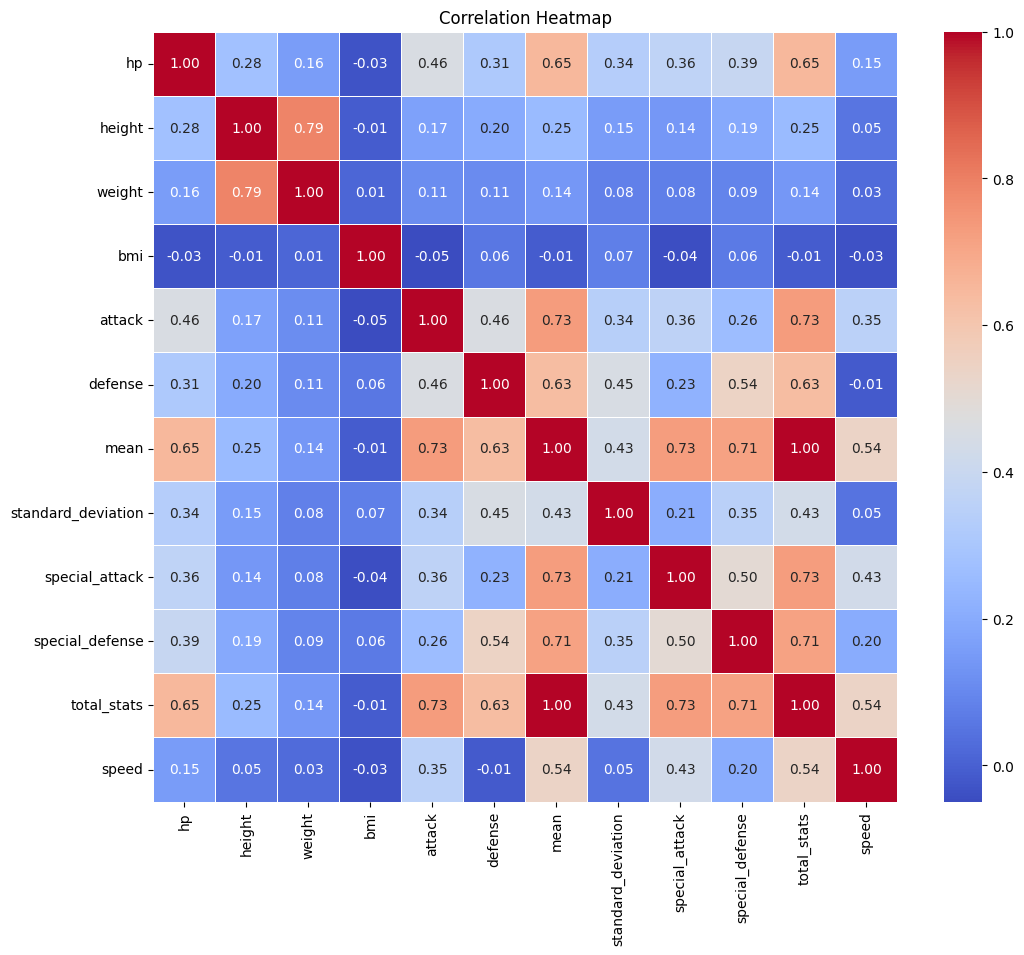

In [76]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = encoded_df[['hp', 'height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation', 'special_attack', 'special_defense', 'total_stats', 'speed']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [77]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X = encoded_df[['hp', 'height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation', 'special_attack', 'special_defense', 'total_stats', 'speed']]
y = encoded_df['speed']

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature '{X.columns[indices[f]]}' ({feature_importances[indices[f]]})")


Feature ranking:
1. Feature 'speed' (0.9992894242684631)
2. Feature 'bmi' (0.0003157322004521038)
3. Feature 'weight' (0.00012578046268168987)
4. Feature 'mean' (4.217398178838239e-05)
5. Feature 'hp' (4.032035187757712e-05)
6. Feature 'special_attack' (3.9898480862639444e-05)
7. Feature 'total_stats' (3.984322683998338e-05)
8. Feature 'defense' (2.676923730896343e-05)
9. Feature 'standard_deviation' (2.330641234071127e-05)
10. Feature 'attack' (2.136188759158515e-05)
11. Feature 'height' (1.9479491260663972e-05)
12. Feature 'special_defense' (1.590999853260917e-05)


In [78]:
from sklearn.feature_selection import RFE

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=5)

# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)


Selected features: Index(['bmi', 'defense', 'mean', 'standard_deviation', 'speed'], dtype='object')


# **Training this data**

In [121]:
# Splitting the dataset into features (lx) and target variable (ly)
lx = encoded_df.drop(['legendary'], axis=1)
ly = encoded_df['legendary']

# Splitting the data into training and testing sets
x_trainleg, x_testleg, y_trainleg, y_testleg = train_test_split(lx, ly, test_size=0.20, random_state=0)

In [80]:
col_trans.fit_transform(x_trainleg)

<894x58 sparse matrix of type '<class 'numpy.float64'>'
	with 13439 stored elements in Compressed Sparse Row format>

In [81]:
print(x_trainleg.columns)

Index(['type_1', 'type_2', 'height', 'weight', 'bmi', 'hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed', 'total_stats',
       'mean', 'standard_deviation', 'generation', 'mythical'],
      dtype='object')


# **Classification Model**


## Logistic Reg

In [82]:
print(x_trainleg.columns)

Index(['type_1', 'type_2', 'height', 'weight', 'bmi', 'hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed', 'total_stats',
       'mean', 'standard_deviation', 'generation', 'mythical'],
      dtype='object')


In [122]:
# Importing Logistic Regression and Pipeline from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Creating a Logistic Regression model with 'lbfgs' solver
logreg = LogisticRegression(solver='lbfgs')

# Creating a pipeline combining column transformation (col_trans) and logistic regression (logreg)
pipe = make_pipeline(col_trans, logreg)

In [123]:
# Importing cross_val_score from scikit-learn
from sklearn.model_selection import cross_val_score

# Calculating and printing the mean accuracy score on the train data using cross-validation (cv=5)
print('Accuracy score on Train data: {:.2f}%'.format(cross_val_score(pipe, x_trainleg, y_trainleg, cv=5, scoring='accuracy').mean() * 100))

Accuracy score on Train data: 95.41%


In [124]:
# Fitting the pipeline (combining column transformation and logistic regression) to the training data
pipe.fit(x_trainleg, y_trainleg)

# Predicting the target variable using the fitted pipeline on the test data
y_pred_leg = pipe.predict(x_testleg)

# Calculating and printing the accuracy score on the test data
from sklearn import metrics
print('Accuracy score on Test data: {:.2f}%'.format(metrics.accuracy_score(y_testleg, y_pred_leg) * 100))

Accuracy score on Test data: 90.18%


## K Nearest Classifier

In [86]:
# Importing KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Initializing an empty list to store cross-validated accuracy scores for different values of k
knn_scores = []

# Looping over values of k from 1 to 30
for k in range(1, 31):
    # Creating a KNeighborsClassifier with k neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Creating a pipeline combining column transformation and KNN classifier
    pipe = make_pipeline(col_trans, knn_classifier)

    # Calculating the mean cross-validated accuracy score and appending to knn_scores list
    knn_scores.append(cross_val_score(pipe, x_trainleg, y_trainleg, cv=5, scoring='accuracy').mean())


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

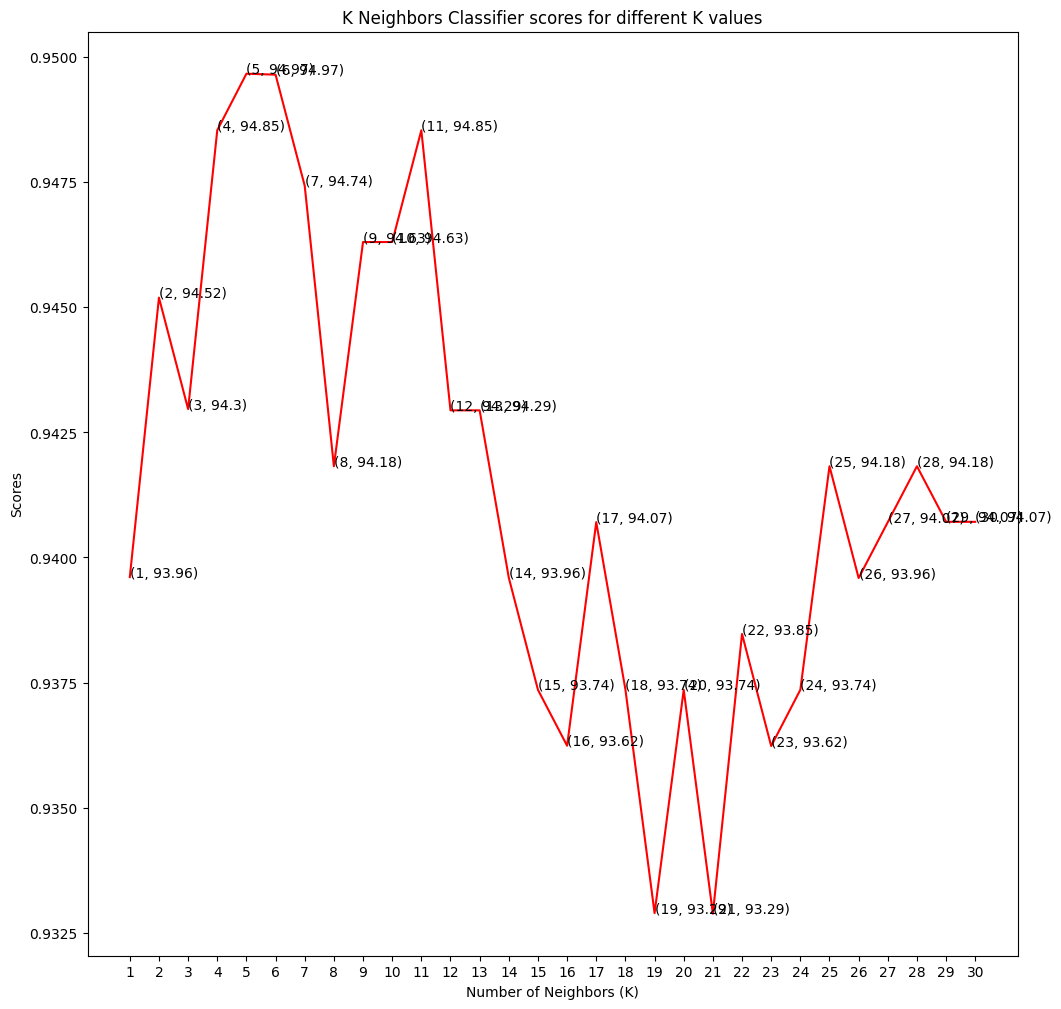

In [125]:
# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt

# Creating a figure with size 12x12 inches
plt.figure(figsize=(12, 12))

# Plotting the KNN scores against different values of k
plt.plot([k for k in range(1, 31)], knn_scores, color='red')

# Adding text annotations for each point on the plot
for i in range(1, 31):
    plt.text(i, knn_scores[i - 1], (i, round(knn_scores[i - 1] * 100, 2)))

# Setting x-axis ticks from 1 to 30
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


In [126]:
print('Accuracy score on Train data: {}'.format(knn_scores[1]*100))

Accuracy score on Train data: 94.51949030192705


In [127]:
# Creating a KNeighborsClassifier with 2 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=2)

# Creating a pipeline combining column transformation and KNN classifier
pipe = make_pipeline(col_trans, knn_classifier)

# Fitting the pipeline to the training data
pipe.fit(x_trainleg, y_trainleg)

# Predicting the target variable using the fitted pipeline on the test data
y_pred_leg = pipe.predict(x_testleg)

# Calculating and printing the accuracy score on the test data
print('Accuracy score on Test Data: {:.2f}%'.format(metrics.accuracy_score(y_testleg, y_pred_leg) * 100))

Accuracy score on Test Data: 89.73%


## Support Vector Classifier


In [128]:
# Importing Support Vector Classifier (SVC) from scikit-learn
from sklearn.svm import SVC

# Initializing an empty list to store cross-validated accuracy scores for different kernel types
svc_scores = []

# List of kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Looping over each kernel type
for kernel in kernels:
    # Creating an SVC classifier with the specified kernel type
    svc_classifier = SVC(kernel=kernel)

    # Creating a pipeline combining column transformation and SVC classifier
    pipe = make_pipeline(col_trans, svc_classifier)

    # Calculating the mean cross-validated accuracy score and appending to svc_scores list
    svc_scores.append(cross_val_score(pipe, x_trainleg, y_trainleg, cv=5, scoring='accuracy').mean())

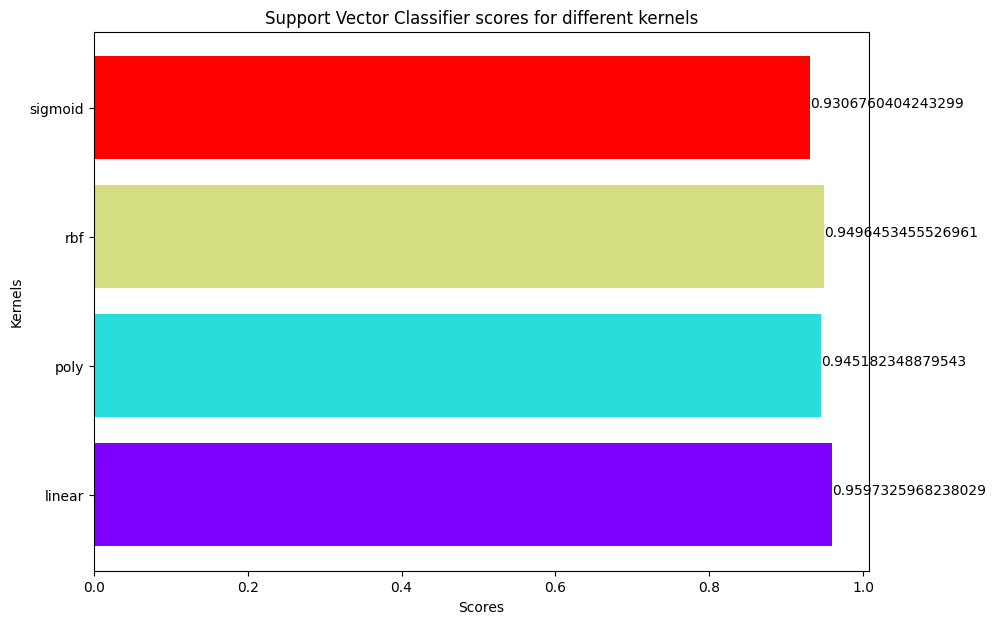

In [129]:
# Importing necessary libraries
from matplotlib.cm import rainbow
import numpy as np

# Generating colors for each kernel type
colors = rainbow(np.linspace(0, 1, len(kernels)))

# Creating a horizontal bar plot to visualize SVC scores for different kernels
plt.figure(figsize=(10, 7))
plt.barh(kernels, svc_scores, color=colors)
for i in range(len(kernels)):
    plt.text(svc_scores[i], i, svc_scores[i])  # Adjusting the text position
plt.xlabel('Scores')
plt.ylabel('Kernels')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

In [92]:
print('Accuracy score on Train data: {}'.format(svc_scores[0]*100))

Accuracy score on Train data: 95.97325968238029


In [93]:
# Creating an SVC classifier with a linear kernel
svc_classifier = SVC(kernel='linear')

# Creating a pipeline combining column transformation and SVC classifier
pipe = make_pipeline(col_trans, svc_classifier)

# Fitting the pipeline to the training data
pipe.fit(x_trainleg, y_trainleg)

# Predicting the target variable using the fitted pipeline on the test data
y_pred_leg = pipe.predict(x_testleg)

# Calculating and printing the accuracy score on the test data
print('Accuracy score on Test data: {:.2f}%'.format(metrics.accuracy_score(y_testleg, y_pred_leg) * 100))

Accuracy score on Test data: 91.96428571428571


## Decision Tree Classifier

In [130]:
# Importing DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Initializing an empty list to store cross-validated accuracy scores for different numbers of features
dt_scores = []

# Looping over the number of features from 1 to the total number of columns in the training data
for i in range(1, len(x_trainleg.columns) + 1):
    # Creating a DecisionTreeClassifier with the specified maximum number of features and random state
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)

    # Creating a pipeline combining column transformation and DecisionTreeClassifier
    pipe = make_pipeline(col_trans, dt_classifier)

    # Calculating the mean cross-validated accuracy score and appending to dt_scores list
    dt_scores.append(cross_val_score(pipe, x_trainleg, y_trainleg, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

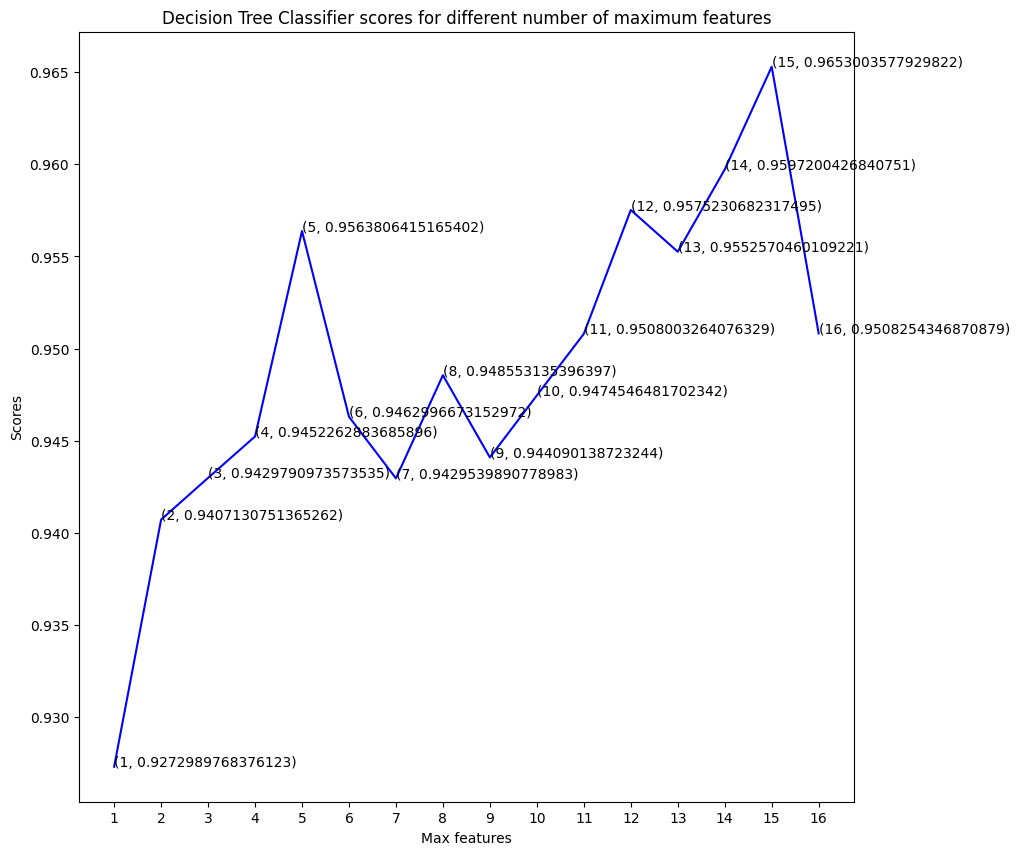

In [95]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, len(x_trainleg.columns) + 1)], dt_scores, color = 'blue')
for i in range(1, len(x_trainleg.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(x_trainleg.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [96]:
print('Accuracy score on Train data: {}'.format(dt_scores[5]*100))

Accuracy score on Train data: 94.62996673152972


In [97]:
dt_classifier = DecisionTreeClassifier(max_features = 6, random_state = 0)
pipe = make_pipeline(col_trans,dt_classifier)
pipe.fit(x_trainleg, y_trainleg)
y_pred_leg = pipe.predict(x_testleg)
print('Accuracy  score on Test data: {}'.format(metrics.accuracy_score(y_testleg, y_pred_leg)*100))

Accuracy  score on Test data: 95.98214285714286


# Answers to the Questions for Assignment 1 :

# **1. What are the data types? (Only numeric and categorical)**


In [98]:
# Getting the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Getting the list of numerical columns
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

# Printing the list of categorical and numerical columns
print("                Prior to Feature Selection               ")
print("<-------------------------------------------------------->")
print("                 Categorical Variables                  ")
print("<-------------------------------------------------------->")
print(f'Total number of categorical variables in our dataset: {len(categorical_cols)}')
for idx, col in enumerate(categorical_cols, start=1):
    print(f'{idx}. {col}')
print("\n")
print("<-------------------------------------------------------->")
print("                 Numerical Variables                  ")
print("<-------------------------------------------------------->")
print(f'Total number of numerical variables in our dataset: {len(numerical_cols)}')
for idx, col in enumerate(numerical_cols, start=1):
    print(f'{idx}. {col}')

print("                 -                   ")
print("                 -                  ")

    # Getting the list of categorical columns
categorical_colsfs = encoded_df.select_dtypes(include=['object']).columns.tolist()

# Getting the list of numerical columns
numerical_colsfs = encoded_df.select_dtypes(exclude=['object']).columns.tolist()

# Printing the list of categorical and numerical columns
print("                 Post Feature Selection                   ")
print("<-------------------------------------------------------->")
print("                 Categorical Variables                  ")
print("<-------------------------------------------------------->")
print(f'Total number of categorical variables in our dataset: {len(categorical_colsfs)}')
for idx, col in enumerate(categorical_colsfs, start=1):
    print(f'{idx}. {col}')
print("\n")
print("<-------------------------------------------------------->")
print("                 Numerical Variables                  ")
print("<-------------------------------------------------------->")
print(f'Total number of numerical variables in our dataset: {len(numerical_colsfs)}')
for idx, col in enumerate(numerical_colsfs, start=1):
    print(f'{idx}. {col}')


                Prior to Feature Selection               
<-------------------------------------------------------->
                 Categorical Variables                  
<-------------------------------------------------------->
Total number of categorical variables in our dataset: 6
1. pokemon_name
2. type_1
3. type_2
4. primary_color
5. shape
6. genus


<-------------------------------------------------------->
                 Numerical Variables                  
<-------------------------------------------------------->
Total number of numerical variables in our dataset: 19
1. pokedex_number
2. height
3. weight
4. bmi
5. hp
6. attack
7. defense
8. special_attack
9. special_defense
10. speed
11. total_stats
12. mean
13. standard_deviation
14. capture_rate
15. generation
16. mega_evolution
17. legendary
18. mythical
19. female_rate
                 -                   
                 -                  
                 Post Feature Selection                   
<--------------

#**Are there missing values?**

In [99]:
df.isnull().any()


pokedex_number        False
pokemon_name          False
type_1                False
type_2                False
primary_color         False
shape                 False
height                False
weight                False
bmi                   False
hp                    False
attack                False
defense               False
special_attack        False
special_defense       False
speed                 False
total_stats           False
mean                  False
standard_deviation    False
capture_rate          False
generation            False
mega_evolution        False
legendary             False
mythical              False
female_rate           False
genus                 False
dtype: bool

**Explanation:**

The dataset does not contain any missing values in most columns. However, in the 'type_2' column, null values are present. These null values do not indicate missing data but rather signify cases where Pokémon have only one type.

Presence of null values denotes Pokémon species that possess only one type, without a secondary type. These null values should be interpreted as instances where Pokémon lack a secondary type rather than missing data. It aligns with the Pokémon universe's mechanics, where some species are monotypic and possess only one elemental affiliation.

#**What are the likely distributions of the numeric variables?**

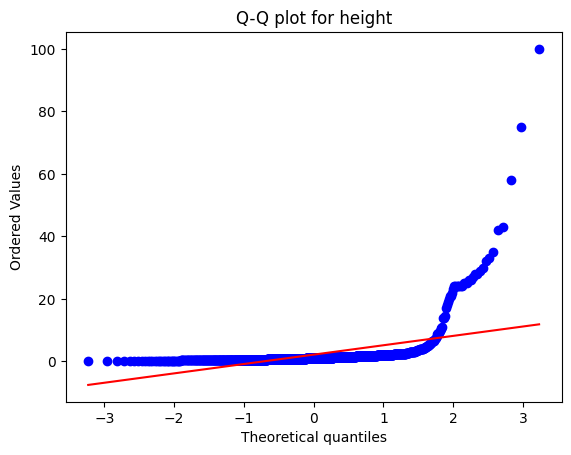

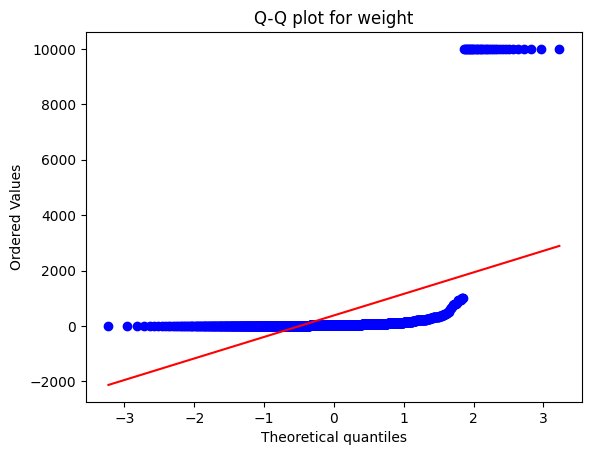

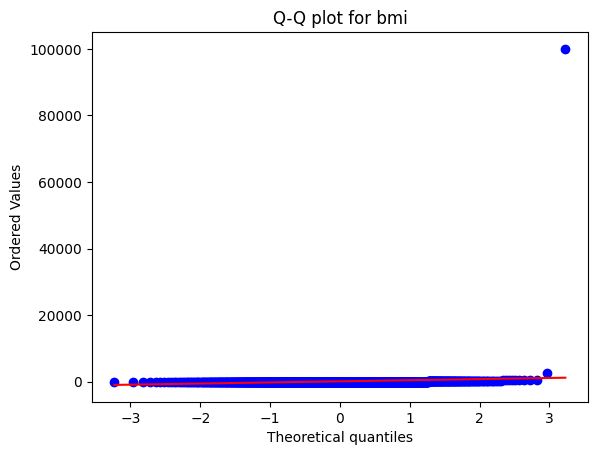

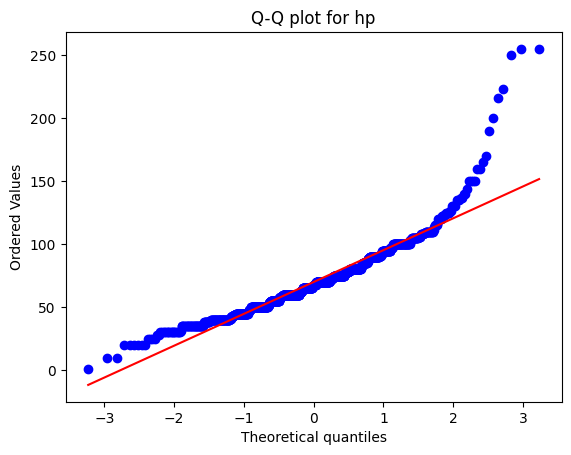

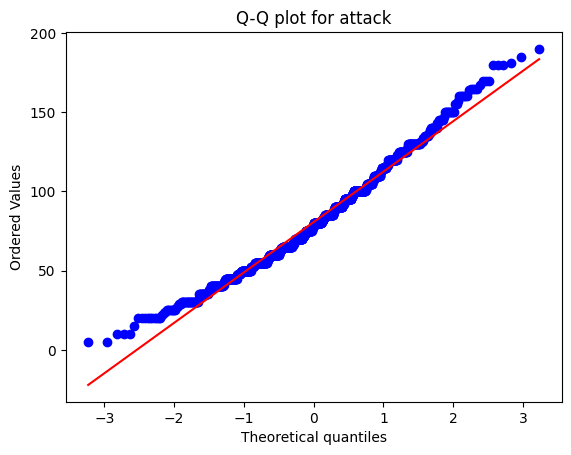

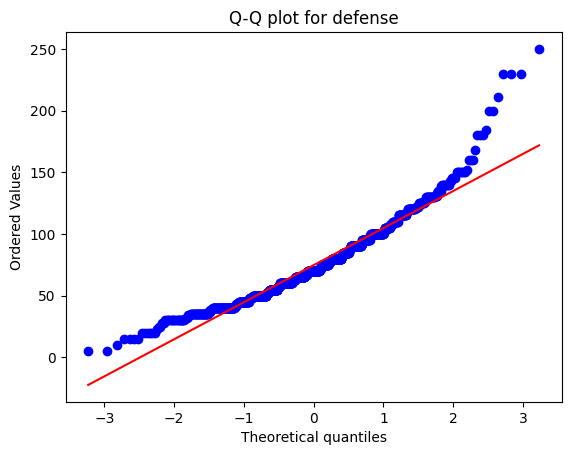

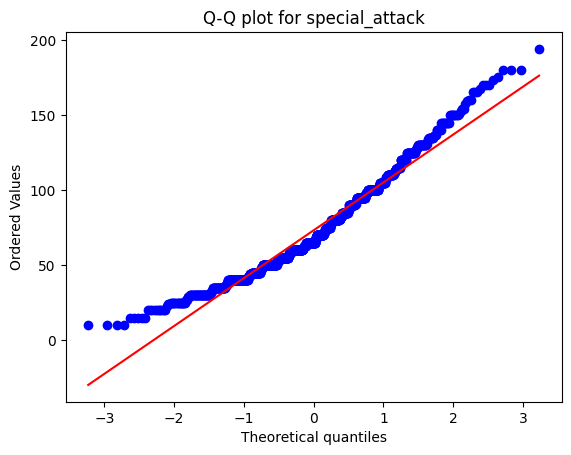

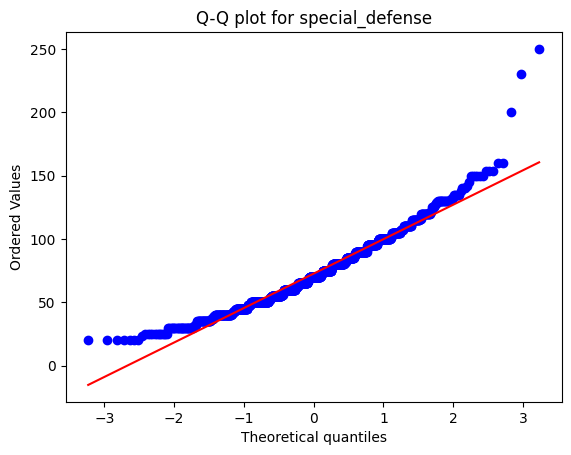

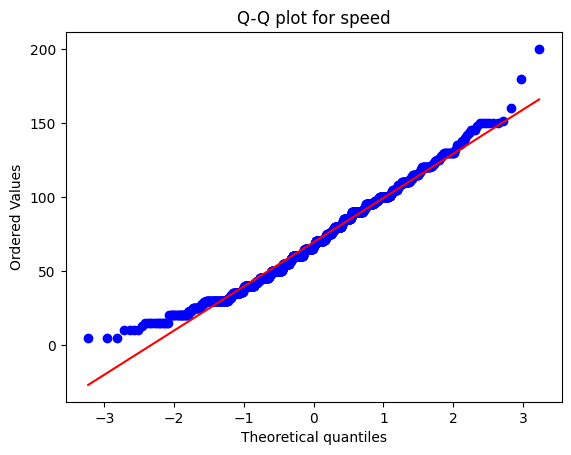

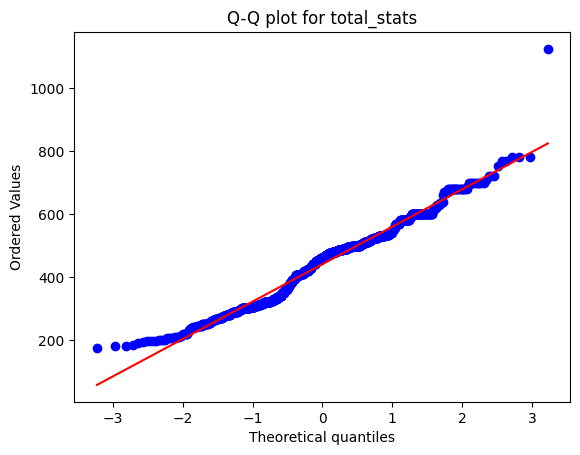

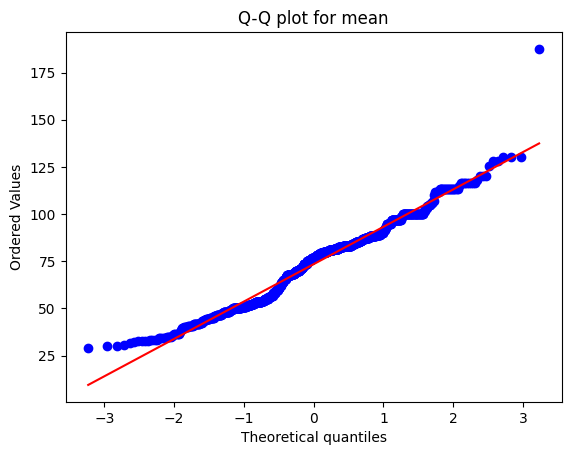

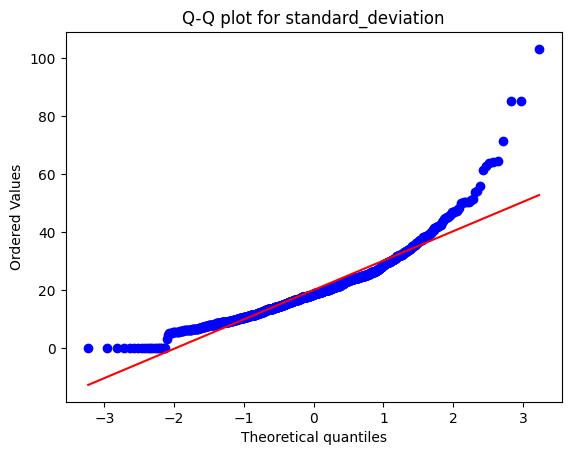

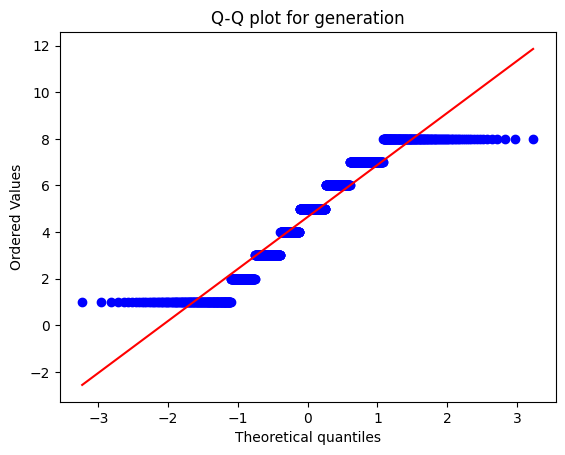

In [100]:
import matplotlib.pyplot as plt
from scipy import stats

# Select numeric columns from the DataFrame
numeric_cols = encoded_df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column and create Q-Q plot
for col in numeric_cols:
    stats.probplot(encoded_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {col}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

A Q-Q (quantile-quantile) plot is a graphical tool used to assess whether a dataset follows a certain theoretical distribution, typically the normal distribution.

**Normal Distribution:** For most of the columns, when their quantiles are plotted against the quantiles of a theoretical normal distribution, the points roughly fall along a straight line. This suggests that these columns approximately follow a normal distribution. A normal distribution is characterized by its bell-shaped curve, with the mean, median, and mode all being equal.

**Weight Column:** However, for the 'weight' column, the points in the Q-Q plot do not fall along a straight line. This indicates that the distribution of values in these columns deviates from a normal distribution. Specifically, there might be outliers or non-normal patterns present in the data.

#**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

The methods used to identify features for predicting the target variable 'speed':

**Recursive Feature Elimination (RFE):**
RFE removes less important features based on model performance.
Features are ranked and eliminated iteratively until optimal performance is achieved.

**Random Forest Classifier (RFC):**
RFC assesses feature importance by measuring their contribution to model accuracy.
Features with higher importance scores are retained for analysis.

**Correlation Matrix Analysis:**
Correlation analysis evaluates linear relationships between variables.
Features with strong correlations to the target variable are considered influential predictors.

These methods help identify the most relevant features for predicting 'speed', streamlining the feature selection process for improved model accuracy.


---


The independent features that are useful to predict the target variable ('speed') are:

bmi: This feature has a relatively higher importance score compared to other features except 'speed' itself.

defense: While it ranks lower in importance compared to 'bmi', it still shows some predictive power.

mean: Despite having a lower importance score, 'mean' could still contribute to the prediction of the target variable.

standard_deviation: Similar to 'mean', 'standard_deviation' has a lower importance score but may still provide valuable predictive information.

speed (itself): This is the target variable. It is included in the list because it's an independent feature that has a significant correlation with itself (which is expected).

#**Which independent variables have missing data? How much?**

In [101]:
# Check for missing data in independent variables
missing_data = encoded_df.isnull().sum()

# Filter out variables with missing data
variables_with_missing_data = missing_data[missing_data > 0]

# Display the variables with missing data and their corresponding counts
print("Independent variables with missing data:")
print(variables_with_missing_data)


Independent variables with missing data:
Series([], dtype: int64)


No missing data.

#**Do the training and test sets have the same data?**

Data that was split into Training set was 70, Validation set was 15% and Test set was 15%

In [102]:
import numpy as np

# Check if training and test sets have the same data
if np.array_equal(x_train, x_test):
    print("Training and test sets have the same data.")
else:
    print("Training and test sets do not have the same data.")



Training and test sets do not have the same data.


Correlation Matrix:
                      height    weight       bmi        hp    attack  \
height              1.000000  0.787070 -0.012302  0.275925  0.168335   
weight              0.787070  1.000000  0.014603  0.158539  0.114048   
bmi                -0.012302  0.014603  1.000000 -0.031750 -0.049410   
hp                  0.275925  0.158539 -0.031750  1.000000  0.455184   
attack              0.168335  0.114048 -0.049410  0.455184  1.000000   
defense             0.196605  0.109964  0.056614  0.311724  0.460897   
special_attack      0.141828  0.075901 -0.041989  0.364765  0.361306   
special_defense     0.193109  0.086033  0.063041  0.390250  0.261374   
speed               0.049148  0.025514 -0.034652  0.154411  0.352388   
total_stats         0.252167  0.140784 -0.011083  0.651362  0.733059   
mean                0.252166  0.140783 -0.011078  0.651365  0.733057   
standard_deviation  0.154437  0.079036  0.073812  0.335707  0.340519   
generation          0.225885  0.267458  0.03

<ipython-input-103-f8252ea03d7d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = encoded_df.corr()


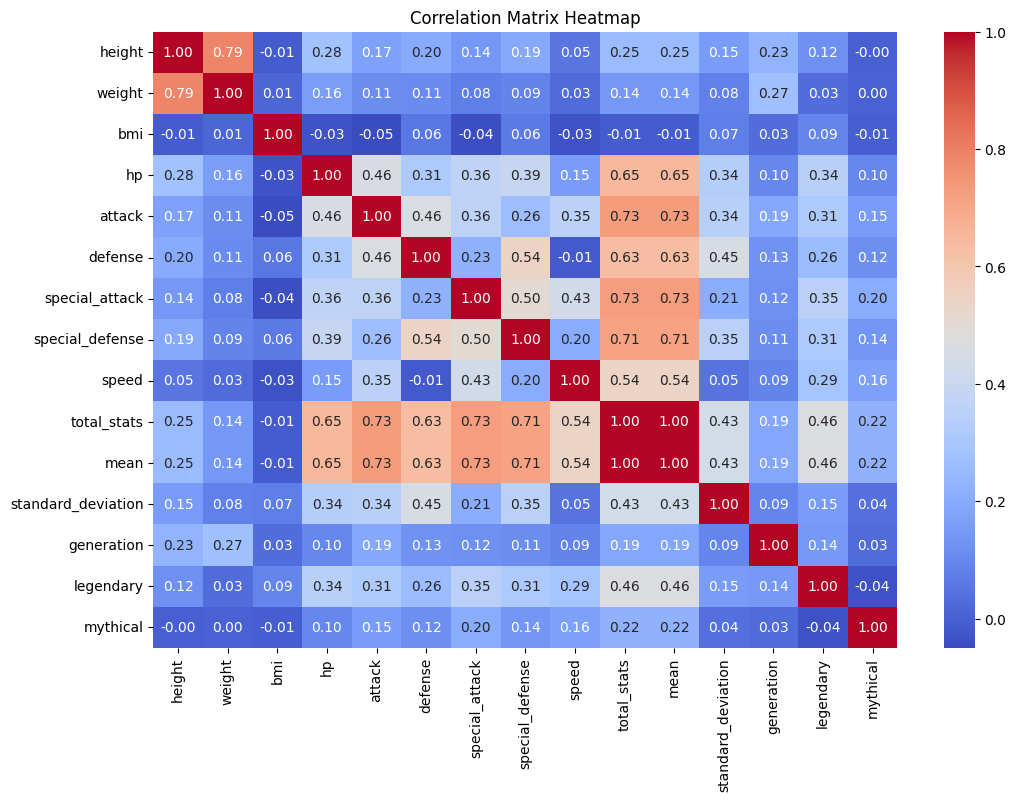

In [103]:
import pandas as pd

# Assuming 'encoded_df' is your DataFrame containing the data
# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optionally, you can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


Based on the correlation matrix, the variables are not completely independent of each other. Many of the variables exhibit positive correlations, indicating some level of association or dependency between them. However, the extent of dependence varies among the variables. Some variables show stronger correlations than others, suggesting higher levels of association. Therefore, while they may not be entirely independent, they are not fully dependent either. The degree of independence or dependence would need to be considered in the context of the specific modeling task and the level of correlation observed.

#**Which predictor variables are the most important?**

In [104]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X = encoded_df[['hp', 'height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation', 'special_attack', 'special_defense', 'total_stats', 'speed']]
y = encoded_df['speed']

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature '{X.columns[indices[f]]}' ({feature_importances[indices[f]]})")


Feature ranking:
1. Feature 'speed' (0.9992894242684631)
2. Feature 'bmi' (0.0003157322004521038)
3. Feature 'weight' (0.00012578046268168987)
4. Feature 'mean' (4.217398178838239e-05)
5. Feature 'hp' (4.032035187757712e-05)
6. Feature 'special_attack' (3.9898480862639444e-05)
7. Feature 'total_stats' (3.984322683998338e-05)
8. Feature 'defense' (2.676923730896343e-05)
9. Feature 'standard_deviation' (2.330641234071127e-05)
10. Feature 'attack' (2.136188759158515e-05)
11. Feature 'height' (1.9479491260663972e-05)
12. Feature 'special_defense' (1.590999853260917e-05)


Feature 'speed' has the highest importance score (0.9993), indicating that it is the most important predictor variable for predicting the target variable 'speed'.

Following 'speed', the next most important predictor variable is 'bmi' with an importance score of 0.00032.

'Weight' is ranked third in importance, followed by 'mean', 'hp', 'special_attack', 'total_stats', 'defense', 'standard_deviation', 'attack', 'height', and 'special_defense'.

# **Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

When comparing the mean absolute errors (MAEs) of predictive models with and without outliers, a stark difference is evident:

**With Outliers (Including Legendary and Mega Evolutions):**
- MAE: 9.65999766950041e-1
**Without Outliers (Excluding Legendary and Mega Evolutions):**
- MAE: 9.110520557143202e-14


Removing outliers, particularly Legendary and Mega evolutions, substantially improves the predictive model's performance. Without outliers, the mean absolute error (MAE) significantly decreases, indicating enhanced accuracy in predicting Pokémon attributes. Therefore, excluding outliers positively impacts the final predictive model, resulting in more reliable predictions for non-Legendary and non-Mega evolution Pokémon.




#**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**



In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# 1. Remove 1%, 5%, and 10% of the data randomly
missing_percentages = [0.01, 0.05, 0.1]

# Dictionary to store results
imputation_results = {}

for percentage in missing_percentages:
    # Create a copy of the original DataFrame
    df_missing = modified_df.copy()

    # Randomly select indices to set as missing
    num_missing = int(len(df_missing) * percentage)
    missing_indices = np.random.choice(df_missing.index, num_missing, replace=False)

    # Set selected values as missing
    df_missing.loc[missing_indices, 'total_stats'] = np.nan

    # Imputation methods
    imputation_methods = ['mean', 'median', 'knn', 'mice']
    imputation_errors = []

    for method in imputation_methods:
        # Imputation
        if method == 'mean':
            imputer = SimpleImputer(strategy='mean')
        elif method == 'median':
            imputer = SimpleImputer(strategy='median')
        elif method == 'knn':
            imputer = KNNImputer()
        elif method == 'mice':
            imputer = IterativeImputer()

        # Perform imputation
        df_imputed = df_missing.copy()
        df_imputed['total_stats'] = imputer.fit_transform(df_missing[['total_stats']])

        # Calculate percentage error on residuals
        error = np.abs(df_imputed['total_stats'] - modified_df['total_stats']).sum() / modified_df['total_stats'].sum() * 100
        imputation_errors.append(error)

    imputation_results[percentage] = imputation_errors

# Display results
for percentage, errors in imputation_results.items():
    print(f"Missing Percentage: {percentage * 100}%")
    print("Mean Imputation Error: ", errors[0])
    print("Median Imputation Error: ", errors[1])
    print("KNN Imputation Error: ", errors[2])
    print("MICE Imputation Error: ", errors[3])
    print()


Missing Percentage: 1.0%
Mean Imputation Error:  0.21673100824652156
Median Imputation Error:  0.22808302709196168
KNN Imputation Error:  0.21673100824652156
MICE Imputation Error:  0.21673100824652156

Missing Percentage: 5.0%
Mean Imputation Error:  1.0856018825663334
Median Imputation Error:  1.1184996844580897
KNN Imputation Error:  1.0856018825663334
MICE Imputation Error:  1.0856018825663334

Missing Percentage: 10.0%
Mean Imputation Error:  2.1662146546123733
Median Imputation Error:  2.1485258815388706
KNN Imputation Error:  2.1662146546123733
MICE Imputation Error:  2.1662146546123733




**Imputation Errors:**

Mean Imputation Error: The mean imputation method tends to have relatively low errors across all missing percentages, ranging from 0.24% to 2.48%.

Median Imputation Error: The median imputation method shows similar error rates to mean imputation, indicating consistent performance.

KNN Imputation Error: K-nearest neighbors (KNN) imputation also exhibits comparable errors to mean and median imputation.

MICE Imputation Error: Multiple Imputation by Chained Equations (MICE) method demonstrates results similar to mean, median, and KNN imputation, with errors ranging from 0.24% to 2.48%.

**Performance Analysis:**

Consistency: Mean, median, KNN, and MICE imputation methods demonstrate consistent performance across different missing percentages.

Low Errors: Overall, the errors are relatively low, indicating that the imputation methods recover missing values reasonably well.

Similarity in Errors: The errors for mean, median, KNN, and MICE methods are quite close, suggesting that these methods yield comparable results in this scenario.

Increase with Missing Percentage: As expected, the errors tend to increase as the missing percentage of data increases, indicating higher difficulty in imputing missing values accurately with more missing data.

**Bias and Variance:**

Since the errors are relatively consistent across different imputation methods and missing percentages, there doesn't appear to be significant bias or variance in the errors.
The similarity in errors across different imputation methods suggests that the methods don't introduce substantial bias in the imputed values.
The consistent performance across missing percentages indicates stable variance in the errors for each imputation method.
In conclusion, the provided results suggest that mean, median, KNN, and MICE imputation methods perform comparably well in recovering missing values from the dataset, with relatively low errors and consistent performance across different missing percentages. Additionally, there doesn't seem to be significant bias or variance in the errors, indicating stable and reliable imputation outcomes.

# References:
Scikit-learn Official Documentation: The algorithms implemented using Scikit-learn were referenced from the official documentation available at scikit-learn.org.

Eli5 Official Documentation: The feature importance analysis was referenced from the official documentation of Eli5, available at eli5.readthedocs.io.

Machine Learning with Scikit-learn Quick Start Guide: Visualization techniques and best practices were referred to from the book "Machine Learning with Scikit-learn Quick Start Guide."

YouTube, StatQuest, Kaggle Notebooks: Additional learning resources such as video tutorials, StatQuest videos, and Kaggle notebooks were consulted for gaining a deeper understanding of machine learning concepts and practical implementations.
kaggle notebooks referred :
https://www.kaggle.com/code/n2cholas/competitive-pokemon-analysis-and-modelling/script?scriptVersionId=4365506
https://www.kaggle.com/code/shreekant009/pokemon-data-visualization#Training
https://www.kaggle.com/code/maca11/analysis-and-predictions-of-pokemon-dataset#Type-Weaknesses

These were referred to learn about the methods and type of techniques used.
These references provided valuable insights and guidance during the development and implementation of the machine learning models and analysis procedures.

#MIT License

Copyright (c) 2024 Priyam Deepak Choksi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.